# Overview and examples of pysymlog usage

# Table of Contents

1. [Overview](#overview)
   
   a.) [The symmetric logarithm transform functions](#transforms)

   b.) [Generating arrays of symlog decades](#decades)

   c.) [Histograms with symmetric log bins](#histograms)
   
2. [Using pysymlog with matplotlib](#matplotlib)
   
   a.) [Register the matplotlib functions](#register)
   
   b.) [Comparison to mpl symlog scale](#symlogcomp)

   c.) [The "shift" parameter for plotting scale](#shift)

   d.) [The "thresh" parameter for ticks](#thresh)

   e.) [Error bars](#errorbars)

   f.) [Histogram plots with symmetric log bins](#histplots)

   g.) [Making 2D plots with symmetric log scaling](#2D)

   h.) [Colorbar and cmap normalization](#colornorm)

   i.) [2D histogram plots with symmetric log scaling](#2Dhistplots)

   j.) [Locators and Formatters - controlling ticks](#locators)

3. [Using pysymlog with plotly](#plotly)

   a.) [Symmetric log scale with plotly.graph_objects](#plotly.go)

   b.) [Symmetric log scale with plotly.express](#plotly.px)

   c.) [plotly histograms with symmetric log bins](#plotly.hist)

   d.) [2D plotly density maps with symmetric log bins](#plotly.2Dhist)



------------------------------------------
## <u>Overview</u> <a name="overview"></a>

The pysymlog package provides utilities for plotting in matplotlib, plotly, etc. using a symmetric or signed log transform.
This allows the plotting of positive and negative data with a pseudo-log axis scale or stretch for the data far from zero, and a smooth pseudo-linear scale transition through zero. 

Functions available immediately on pysymlog import (no other packages like matplotlib are needed or even imported at this stage, to keep it lightweight), for calculating and manipulating the signed logarithms.

- ```symmetric_logarithm(arg, base=10, shift=1)```

- ```inverse_symmetric_logarithm(arginv, base=10, shift=1)```

- ```make_symmetric_logarithm(base=10, shift=1)```

- ```make_inverse_symmetric_logarithm(base=10, shift=1)```

- ```symmetric_logspace(lo,hi,N, input_format='linear', shift=1, base=10)```

- ```symmetric_logspace_from_array(array, N, input_format='linear', shift=1, base=10)```

- ```symmetric_log_decades(lo, hi, thresh, include_zero=True)```

- ```symmetric_log_decades_from_array(data, thresh='auto', auto_percentile=10., include_zero=True)```

- ```symlogbin_histogram(data, Nbins, limits=['auto','auto'], shift=1, base=10, density=False, weights=None)```

- ```symlogbin_histogram2d(xdata, ydata, Nbins, limits=[['auto','auto'], ['auto','auto']], shift=1, base=10, density=False, weights=None)```

</br>

Functions to register pysymlog scaling functionality with matplotlib or plotly, enabling use of the plotting scales, transforms, and convenience functions:

- ```register_mpl()```

- ```register_plotly()```

Run the appropriate command from above in order to make available all the matplotlib or plotly functions, classes, etc.  They are not all loaded by default - this is intentional, in order to keep the import lightweight.  No matplotlib utilities are called outside of register_mpl(), so that plotly sessions do not require importing matplotlib.  Ditto for plotly, so that users do not need to install and import plotly in order to use the matplotlib functions.  Only numpy is a required dependency; matplotlib and plotly are each optional dependencies. 

</br>
</br>

pysymlog has several utilities for use in matplotlib.
These include classes for locators and scales, that work equivalently to standard matplotlib utilities such as LogLocator, LogTransform, LogScale; colorbar and cmap normalization that works equivalently to other mpl.colors Normalizations; and convenience functions for plotting histograms with symmetric log bins.

Transforms:

- ```SymmetricLogarithmTransform```

- ```InvertedSymmetricLogarithmTransform```

Scale class:

- ```SymmetricLogarithmScale```

Locators (primarily for controlling ticks):

- ```SymmetricLogarithmLocator```

- ```MinorSymmetricLogLocator```

- ```MinorSymLogLocator```

Functions available for controlling matplotlib ticks:

- ```set_symmetriclog_minorticks(axin,xy='y',thresh=1e-1, formatter=ticker.NullFormatter() )```

- ```set_symlog_minorticks(axin,xy='y',thresh=1e-1, formatter=ticker.NullFormatter())```

- ```reformat_major_ticklabels(ax, xy='y', tickvals='auto', fmt='{:g}', lineobjind=0, thresh='auto', auto_percentile=10.)```

Normalization (for colorbars, cmaps)

- ```SymmetricLogarithmNorm```

Plotting functions

- ```symlogbin_hist_mpl(ax, data, Nbins, limits=['auto','auto'], shift=1, base=10, orientation='vertical', density=False, **hist_kwargs)```

</br>
</br>

There are also convenience functions for plotting in plotly:

General function for setting the scale on one or both axes to symmetric logarithm

- ```set_plotly_scale_symmetriclog(fig, plot_obj_index=0, xy='both', tickvals_x='auto', tickvals_y='auto', auto_percentile=10., shift=1., base=10)```

plotly.graph_objects convenience functions for making scatterplots, lines, and histograms

- ```go_scatter_symlog(fig, xvals, yvals, tickvals_x='auto', tickvals_y='auto', xy='both', shift=1., base=10, **scatter_kwargs)```

- ```go_line_symlog(fig, xvals, yvals, tickvals_x='auto', tickvals_y='auto', xy='both', shift=1., base=10, **line_kwargs)```

- ```go_histogram_symlog(histdata, bins, density=False, binwidth_frac=1., shift=1, base=10, orientation='vertical', tickvals_x='auto', tickvals_y='auto', **traces_kwargs)```

plotly.express convenience functions for making scatterplots, lines, and histograms

- ```px_scatter_symlog(xvals, yvals, tickvals_x='auto', tickvals_y='auto', xy='both', shift=1., base=10, **scatter_kwargs)```

- ```px_line_symlog(xvals, yvals, tickvals_x='auto', tickvals_y='auto', xy='both', shift=1., base=10, **line_kwargs)```

- ```px_histogram_symlog(histdata, bins, density=False, binwidth_frac=1., shift=1, base=10, orientation='vertical', labels={'x':'Bin values','y':'Counts'}, tickvals_x='auto', tickvals_y='auto', **traces_kwargs)```

</br>

Extensive examples of plots using these utilities are given below.

### The symmetric logarithm transform  <a name="transforms"></a>

Similar to log or asinh transforms found in e.g. matplotlib, the symmetric logarithm transform will rescale values in some range so that they make a more smooth transition through zero.  For matplotlib's symlog, this is done by switching from log scale to linear scale at some threshold for values near zero.  The rescaling depends on a specified threshold (parameter linthresh there) - if the threshold value is reduced, then the other values need to be sread outward to make room for the smaller values now being made visible.  Under the hood, pysymlog accomplishes this with a smooth transition (without the need to make a disjointed switch to linear scale) by shifting the values by some nominal small amount, taking the logarithm, and shifting back. Again, the symmetric logarithm transform is a tool for stretching values in a display window, it is NOT equivalent to taking the true logarithm of a given value.

Arbitrary bases are supported via the ```base``` kwarg.  You can use log scale base 2 for computer or music theory, base *e* for natural logarithm applications, or any or custom bases. Base 42.1973 or 2/3π ? Go nuts, have fun. The rest of this guide will focus on the common log base 10. 

> [!IMPORTANT]
> Like with matplotlib linear-transition symlog or other similar transforms like asinh, the primary purpose of this
> transform is NOT to give exact log-transform values for numerical calculations, but rather to shift the contents
> of a plot in such a way that it transitions through zero in a smooth and continuous way. 

Let's look at some simple examples:

In [1]:
import numpy as np
import pysymlog as psl

print('log10(100) = %f'%(np.log10(100)) )
print('psl.symmetric_logarithm(100, base=10, shift=1) = %f'%(psl.symmetric_logarithm(100)) )

log10(100) = 2.000000
psl.symmetric_logarithm(100, base=10, shift=1) = 2.004321


This makes sense and is the expected behavior - what's going on is that in order to accommodate smaller and smaller plot values near zero (controlled by using smaller shift values), the larger values need to be adjusted outward from zero to make everything fit. 

See the ["shift" parameter for plotting scale](#shift) section below for visual examples of how the transform (with smaller and smaller shift values) squishes the data towards the edges in the *plot frame*.
Here are some more examples.

In [2]:
print('# See how the different values scale using the same shift value')
print('psl.symmetric_logarithm( 100, base=10, shift=1) = %f'%(psl.symmetric_logarithm(100, base=10, shift=1)) )
print('psl.symmetric_logarithm(   1, base=10, shift=1) = %f'%(psl.symmetric_logarithm(1, base=10, shift=1)) )
print('psl.symmetric_logarithm( 0.1, base=10, shift=1) = %f'%(psl.symmetric_logarithm(0.1, base=10, shift=1)) )
print('psl.symmetric_logarithm(0.01, base=10, shift=1) = %f'%(psl.symmetric_logarithm(0.01, base=10, shift=1)) )
print('psl.symmetric_logarithm(   0, base=10, shift=1) = %f'%(psl.symmetric_logarithm(0, base=10, shift=1)) )
print('psl.symmetric_logarithm(-0.1, base=10, shift=1) = %f'%(psl.symmetric_logarithm(-0.1, base=10, shift=1)) )
print('psl.symmetric_logarithm(-100, base=10, shift=1) = %f'%(psl.symmetric_logarithm(-100, base=10, shift=1)) )
print('\n# Note now how the same input value gets "shifted" around the hypothetical plot axis for different shift values ')
print('psl.symmetric_logarithm( 100, base=10, shift=1e-4) = %f'%(psl.symmetric_logarithm(100, base=10, shift=1e-4)) )
print('psl.symmetric_logarithm( 100, base=10, shift=0.1) = %f'%(psl.symmetric_logarithm(100, base=10, shift=0.1)) )
print('psl.symmetric_logarithm( 100, base=10, shift=3) = %f'%(psl.symmetric_logarithm(100, base=10, shift=3)) )
print('psl.symmetric_logarithm( 100, base=10, shift=10) = %f'%(psl.symmetric_logarithm(100, base=10, shift=10)) )

# See how the different values scale using the same shift value
psl.symmetric_logarithm( 100, base=10, shift=1) = 2.004321
psl.symmetric_logarithm(   1, base=10, shift=1) = 0.301030
psl.symmetric_logarithm( 0.1, base=10, shift=1) = 0.041393
psl.symmetric_logarithm(0.01, base=10, shift=1) = 0.004321
psl.symmetric_logarithm(   0, base=10, shift=1) = 0.000000
psl.symmetric_logarithm(-0.1, base=10, shift=1) = -0.041393
psl.symmetric_logarithm(-100, base=10, shift=1) = -2.004321

# Note now how the same input value gets "shifted" around the hypothetical plot axis for different shift values 
psl.symmetric_logarithm( 100, base=10, shift=1e-4) = 6.000000
psl.symmetric_logarithm( 100, base=10, shift=0.1) = 3.000434
psl.symmetric_logarithm( 100, base=10, shift=3) = 1.535716
psl.symmetric_logarithm( 100, base=10, shift=10) = 1.041393


### Generating arrays of symlog decades  <a name="decades"></a>

Convenience functions to create squences of values in log space, similar to numpy.linspace or logpspace but utilizing a smooth transition through zero are ```symmetric_logspace``` and ```symmetric_log_decades```:

In [3]:
## Using symmetric_logspace()
print("psl.symmetric_logspace(-10, 100, N=5):\n    " , psl.symmetric_logspace(-10, 100, N=5))
#--> np.array([-10., -0.90530352, 2.03015151, 16.49415053, 100.])
print("\npsl.symmetric_logspace(-np.log10(10), np.log10(100), N=5, input_format='symlog'):\n    " , psl.symmetric_logspace(-np.log10(10), np.log10(100), N=5, input_format='symlog'))
#--> np.array([-10., -0.90530352, 2.03015151, 16.49415053, 100.])
print("\npsl.symmetric_logspace(-2, 3, N=3, input_format='log'):\n    " , psl.symmetric_logspace(-2, 3, N=3, input_format='log'))
#--> np.array([1.00000000e-02, 3.07963834e+01, 1.00000000e+03])

psl.symmetric_logspace(-10, 100, N=5):
     [-10.          -1.70551455   0.50277146   5.10992318  23.84154266
 100.        ]

psl.symmetric_logspace(-np.log10(10), np.log10(100), N=5, input_format='symlog'):
     [-10.          -1.70551455   0.50277146   5.10992318  23.84154266
 100.        ]

psl.symmetric_logspace(-2, 3, N=3, input_format='log'):
     [1.00000000e-02 9.06991045e+00 9.93991054e+01 1.00000000e+03]


Sometimes it is desirable to generate arrays of decades in plus/minus logspace, in particular for manipulating tick marks and their labels.  ```psl.symmetric_logspace()``` is the tool for this job:

In [4]:
import numpy as np
import pysymlog as psl

## Symmetric log decades
print( 'Symmetric log decades for mi/max [-121,4] and threshold 1e-1: \n  ', psl.symmetric_log_decades(-121, 4, 1e-1)) 

for inputs in [(-1e-4, 4, 1e-6), (-1e-4, 4, 1e1), (-1e3, -1e-2, 1e1), (-1e3, -1e-2, 1e-6), (1e-3, 1e-1, 1e1), (1e-3, 900, 1e1), (-1e7,1e4,10)]:
    print( '\nSymmetric log decades for mi/max [%g,%g] and threshold %g: \n  '%(inputs), psl.symmetric_log_decades(*inputs)) 



Symmetric log decades for mi/max [-121,4] and threshold 1e-1: 
   [-100.   -10.    -1.    -0.1    0.     0.1    1.    10. ]

Symmetric log decades for mi/max [-0.0001,4] and threshold 1e-06: 
   [-1.e-04 -1.e-05 -1.e-06  0.e+00  1.e-06  1.e-05  1.e-04  1.e-03  1.e-02
  1.e-01  1.e+00  1.e+01]

Symmetric log decades for mi/max [-0.0001,4] and threshold 10: 
   [-1.e-04  0.e+00  1.e+01]

Symmetric log decades for mi/max [-1000,-0.01] and threshold 10: 
   [-1.e+03 -1.e+02 -1.e+01 -1.e+00 -1.e-01]

Symmetric log decades for mi/max [-1000,-0.01] and threshold 1e-06: 
   [-1.e+03 -1.e+02 -1.e+01 -1.e+00 -1.e-01]

Symmetric log decades for mi/max [0.001,0.1] and threshold 10: 
   [0.001 0.001 0.01  0.1  ]

Symmetric log decades for mi/max [0.001,900] and threshold 10: 
   [1.e-03 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]

Symmetric log decades for mi/max [-1e+07,10000] and threshold 10: 
   [-1.e+07 -1.e+06 -1.e+05 -1.e+04 -1.e+03 -1.e+02 -1.e+01  0.e+00  1.e+01
  1.e+02  1.e+03  1.e

In [5]:
### Note: this will cause an expected exception, because it's attempting to 
#   generate decades between 0.001 and -0.01...  Input order is [lo,hi,thresh]

try:
    psl.symmetric_log_decades(1e-3, -1e-2, 1e1) #Exception. good.
except:
    print('Exception raised for "lo" value being higher than "hi" value')

Exception raised for "lo" value being higher than "hi" value


Zero is included in the output arrays by default (useful for setting tick marks).  If you don't want zero in your array, set ```include_zero=False```

In [6]:
#psl.symmetric_log_decades(-10, 10, 1e-1, include_zero=True)
print( 'Symmetric log decades including zero: \n  ', psl.symmetric_log_decades(-10, 10, 1e-1, include_zero=True)) 
#psl.symmetric_log_decades(-10, 10, 1e-1, include_zero=False)
print( 'Symmetric log decades without zero: \n  ', psl.symmetric_log_decades(-10, 10, 1e-1, include_zero=False)) 


Symmetric log decades including zero: 
   [-10.   -1.   -0.1   0.    0.1   1.   10. ]
Symmetric log decades without zero: 
   [-10.   -1.   -0.1   0.1   1.   10. ]


You can also give pysymlog an arbitrary array of data and have it attempt to generate sensible symmetric log decades from it. 
Again, use the "thresh" parameter to specify the threshold for passing through zero manually or automatically.

In [7]:
### Automatically calculating symmetric log decades from the values in some array:

dt2 = 0.01
x2 = np.arange(-2, 5.0, dt2)
y2 = np.tan(x2)

#psl.symmetric_log_decades_from_array(y2, thresh='auto')
print( '\nSymmetric log decades from array y2, auto threshold calc: \n  ', psl.symmetric_log_decades_from_array(y2, thresh='auto')) 

#psl.symmetric_log_decades_from_array(y2, thresh=1e1)
print( '\nSymmetric log decades from array y2, threshold specified manually as 10: \n  ', psl.symmetric_log_decades_from_array(y2, thresh=1e1)) 


Symmetric log decades from array y2, auto threshold calc: 
   [-1.e+03 -1.e+02 -1.e+01 -1.e+00 -1.e-01  0.e+00  1.e-01  1.e+00  1.e+01
  1.e+02  1.e+03]

Symmetric log decades from array y2, threshold specified manually as 10: 
   [-1000.  -100.   -10.     0.    10.   100.  1000.]


### Histograms with symmetric log bins  <a name="histograms"></a>

Creating histograms with bins that have steps/bins that scale logarithmically, yet cross through zero to include negative values (transitioning at some desired transition scale), is not only possible but easy to accomplish with pysymlog.  

The simplest way is to use the ```symlogbin_histogram``` function, as demonstrated in this example:

In [8]:
import numpy as np
import pysymlog as psl

## Generate some sample data -- tan(x)
testdat = np.tan( np.linspace(-5,10, 1000) )

## Generate the histogram counts. 
# Like numpy.histogram, the function returns the histogram values and the array of bin edges

counts, bin_edges = psl.symlogbin_histogram(testdat, Nbins=5)

print('Histogram of values for y=tan(x) in range x=[-5,10]')
print('symlog histogram bin edges for y values: \n  ', bin_edges)
print('Histogram counts of y: \n  ', counts)


Histogram of values for y=tan(x) in range x=[-5,10]
symlog histogram bin edges for y values: 
   [-429.97094899  -31.95963486   -1.52067461    4.187389     66.82884486
  885.91096726]
Histogram counts of y: 
   [ 10 183 729  73   5]


The usage of ```symlogbin_histogram``` is very similar to ```numpy.histogram```.  Here's another example, now manually specifying the shift value parameter:

In [9]:
## An example where the shift parameter is specified, to 'zoom in' on the small values
counts,symlogbins = psl.symlogbin_histogram(testdat, 101, limits=['auto','auto'], shift=1e-4)


## Another example, specifying limits (equivalent to range param in np.histogram) and returning count densities
count_densities,symlogbins2 = psl.symlogbin_histogram(testdat, 101, limits=[-1e-5,1e3], shift=1e-3, density=True)


## To use manually-specified bin edges (i.e. not auto-calculate them based on number of bins and min/max limits), 
# input your bins directly into numpy.histogram().
# In this example, use the log-spaced decade values as histogram bin edges.
manual_symlog_bins = psl.symmetric_log_decades(-10,100, thresh=1)
#[-10,1,0,1,10,100]
npcounts, npbins = np.histogram(testdat,manual_symlog_bins)

print('Manual symlog bins: ', manual_symlog_bins)
print('Histogram counts: ', npcounts)

Manual symlog bins:  [-10.  -1.   0.   1.  10. 100.]
Histogram counts:  [228 261 249 195  30]


Two-dimensional histograms are also quite straightforward to produce with pysymlog:

In [10]:
### 2D histograms

## Generate some sample data
dx = np.random.exponential(scale=0.5, size=5000)*np.random.randn(5000)
dy = np.random.exponential(scale=5, size=5000)*np.random.randn(5000)

# 101 auto-calculated bins in each of x,y directions, and a shift of 0.3
hcounts, bins_x, bins_y = psl.symlogbin_histogram2d(dx,dy, 101, limits=['auto','auto'], shift=0.3)

# 41 bins in x, 101 bins in y, and returning count density
hcount_densities,bins_x2, bins_y2 = psl.symlogbin_histogram2d(dx,dy, [41,101], limits=[[-5,5],[-50,50]], shift=1, density=True)


# manually specified bins with edges at the decades, and returning count density
b_x = psl.symmetric_log_decades_from_array(dx, thresh=1)#, include_zero=True)
b_y = psl.symmetric_log_decades_from_array(dy, thresh=1)
npcount_dens, npbins_x2, npbins_y2 = np.histogram2d(dx, dy, bins=[b_x,b_y], density=True, range=[[-5,5],[-50,50]])

print('\nSimple 2D histogram values with bin edges on the decades:')
print('xbins = ', npbins_x2)
print('ybins = ', npbins_y2)
print('count densities = \n', npcount_dens)


Simple 2D histogram values with bin edges on the decades:
xbins =  [-10.  -1.   0.   1.  10.]
ybins =  [-100.  -10.   -1.    0.    1.   10.  100.]
count densities = 
 [[2.71604938e-06 1.75308642e-04 5.33333333e-04 8.44444444e-04
  2.19753086e-04 2.71604938e-06]
 [2.80000000e-04 1.29777778e-02 7.66000000e-02 8.12000000e-02
  1.43111111e-02 2.40000000e-04]
 [2.73333333e-04 1.34666667e-02 8.52000000e-02 7.66000000e-02
  1.29555556e-02 3.04444444e-04]
 [3.45679012e-06 1.85185185e-04 8.44444444e-04 9.55555556e-04
  1.45679012e-04 4.44444444e-06]]


To see matplotlib and [plotly](#plotly.hist) examples of plotting [1D](#histplots) and [2D](#2Dhistplots) histograms, see sections further below. 

For 3+ dimensional histograms, construct the symmetric log bins manually and use them with np.histogramdd()

https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html#numpy.histogramdd

------------------------------------------
## <u>Using pysymlog with matplotlib</u> <a name="matplotlib"></a>

Using pysymlog with matplotlib is fairly straightforward, it's as simple as these steps: 

1. Run the function to register the matplotlib functionality -- ```psl.register_mpl()```

2. code up your plots as usual

3. set the scale to symmetriclog

That's it!  
You can do a lot more, of course, tweaking tick labels and the like.  Read on for many examples of usage. 

### Register the pysymlog utilities within matplotlib <a name="register"></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pysymlog as psl

## Now to register the pysymlog utilities with matplotlib, call the following function:
psl.register_mpl()


Here is an example of usage.  First, simply set the y-scale of a plot with default settings.  

You can set the scale in two ways, just like with linear or log scaling with matplotlib built-ins.
But it's as simple as calling   plt.yscale('symmetriclog')

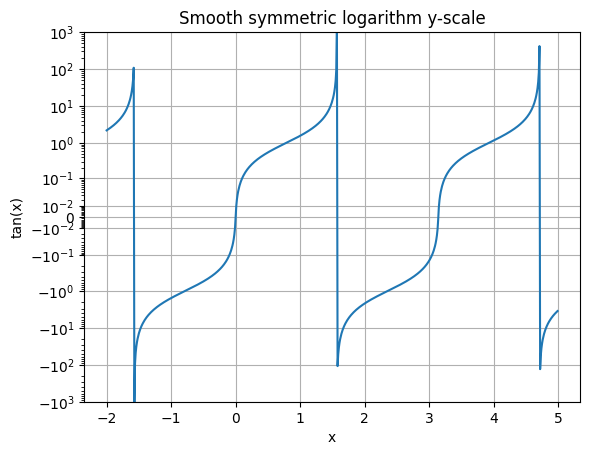

In [12]:
ax1=plt.subplot(111)

## Generate some example data
dt = 0.01
x = np.arange(-2, 5.0, dt)
y = np.tan(x)

plt.plot(x,y);

## Option 1: the 'built-in' method
#plt.yscale( 'symmetriclog', shift=0.01)
#ax1.set_yscale( ...same )
#
## Option 2: Manually invoking the class object
#plt.yscale( SymmetricLogarithmScale(ax1, shift=0.01) )
#ax1.set_yscale( ...same )

plt.yscale( 'symmetriclog', shift=0.01)

ax1.set_ylim(-1e3,1e3)
ax1.grid(True)
plt.xlabel('x')
plt.ylabel('tan(x)')
plt.title('Smooth symmetric logarithm y-scale')
plt.show(); 
plt.clf(); plt.close('all')

With one simple extra call to set the scale, you have now displayed both positive and negative values in log scale!

### Comparing to matplotlib's built-in "symlog" scale <a name="symlogcomp"></a>

Now to compare side-by-side the different scalings: linear, matplotlib built-in "symlog" with linear transition, and pysymlog "symmetriclog" with smooth transition through zero.

Pysymlog includes functions for setting minor ticks for both psl symmetric log scale and mpl symlog scale, respectively called ```set_symmetriclog_minorticks()``` and ```set_symlog_minorticks()```.  This is demonstrated for both below.

Grey shading highlights where the region of the 'transition'. For the linear symlog, in this example the threshhold (linthresh) is 3.0, so that range is [-3,3].  
To get similar-looking overall curve ranges in psl, use a threshhold (thresh) of one tenth what you would for the matplotlib symlog version, so in this case 3/10 = 0.3.
However, for this particular comparison, the shading spans [-3,3] in each panel.

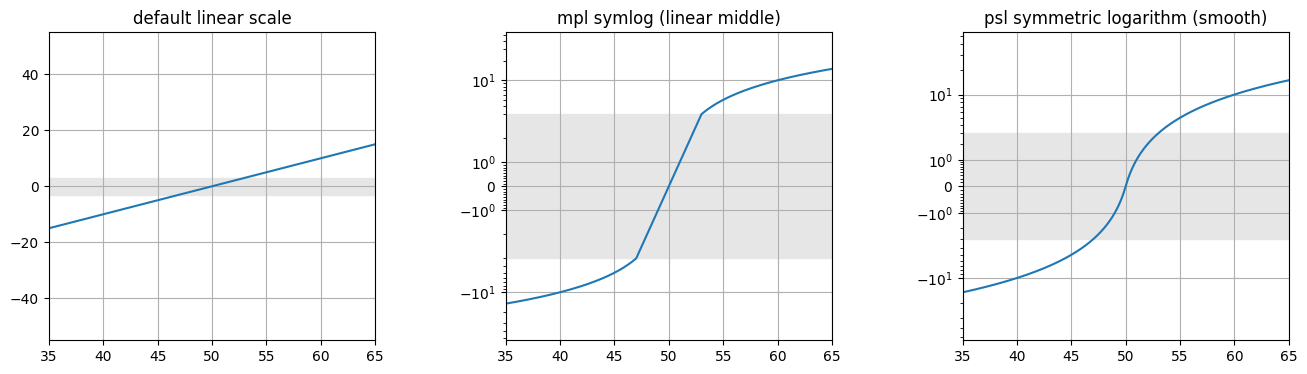

In [13]:
## Example x,y data: just a simple straight line
x = np.arange(0, 100.0, 0.1)
y = np.arange(-50, 50, 0.1)

fig = plt.figure(1,figsize=(16,4)) 

ax1 = plt.subplot(131); plt.title('default linear scale')
plt.plot(x,y);
#plt.yscale('linear')

ax2 = plt.subplot(132); plt.title('mpl symlog (linear middle)')
plt.plot(x,y);
plt.yscale('symlog', linthresh=3); 

psl.set_symlog_minorticks(ax2, xy='y')

ax3 = plt.subplot(133); plt.title('psl symmetric logarithm (smooth)')
plt.plot(x,y);
plt.yscale('symmetriclog')
## Similarly, you can also set the x-scale like so:
#ax3.set_xscale('symmetriclog',shift=1e0)

psl.set_symmetriclog_minorticks(ax3, xy='y', thresh=0.3)
#ax3.yaxis.set_major_locator(FixedLocator([-10,-1,0,1,10]))

for ax in [ax1, ax2, ax3]:
    ax.grid(True)
    ## Set the xlimits and ylimits to the same range for each subplot
    ax.set_ylim(-55,55)
    ax.set_xlim(35,65)
    ## Add some shading to emphasize the region of interest
    ax.axhspan(-3,3, color='0.9', zorder=-1)

plt.subplots_adjust(wspace=0.4)
#plt.savefig('symlog_symmetriclog.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

As an interesting side note, matplotlib allows you to specify a custom scale with the "functions" keyword.  
Here's how you would create the above comparison using this method.
You need to supply functions for the forward and inverse scaling.
In pysymlog, these functions are called ```symmetric_logarithm``` and ```inverse_symmetric_logarithm```.

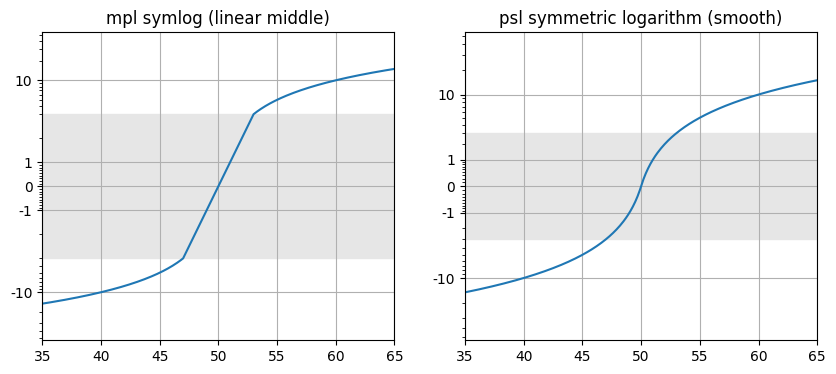

In [14]:
fig=plt.figure(1,figsize=(10,4))

#plt.suptitle('MPL symlog vs symmetriclog with pyplot "functions" scale\n', y=0.99)

ax1 = plt.subplot(121); plt.title('mpl symlog (linear middle)')

plt.plot(x,y);
plt.yscale('symlog', linthresh=3)
psl.set_symlog_minorticks(ax1,xy='y')

ax2 = plt.subplot(122); plt.title('psl symmetric logarithm (smooth)')
plt.plot(x,y);

## Now set the scale with functions
plt.yscale('function', functions=(psl.symmetric_logarithm, psl.inverse_symmetric_logarithm))

psl.set_symmetriclog_minorticks(ax2,xy='y',thresh=3e-1)

for ax in [ax1,ax2]:
    ax.grid(True)
    ax.set_ylim(-55,55)
    ax.set_xlim(35,65)
    ax.axhspan(-3,3, color='0.9', zorder=-1)
    ## Tidy up the major tick labels -- need to do this AFTER setting scale
    psl.reformat_major_ticklabels(ax, tickvals='auto', thresh=1)

#plt.savefig('symlog_symmetriclog_usingfunctions.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


Matplotlib also asinh scale that is useful and gives quite similar results to symmetric log scaling, also with a smooth transition.  For quick no-fuss plots, asinh scaling is another excellent option. Both can support varying pseudo-linear transition regions and arbitrary logarithm bases, as demonstrated below. pysymlog does contain some useful extra features and convenience functions, described throughout this guide, such as histogram generation utilities.

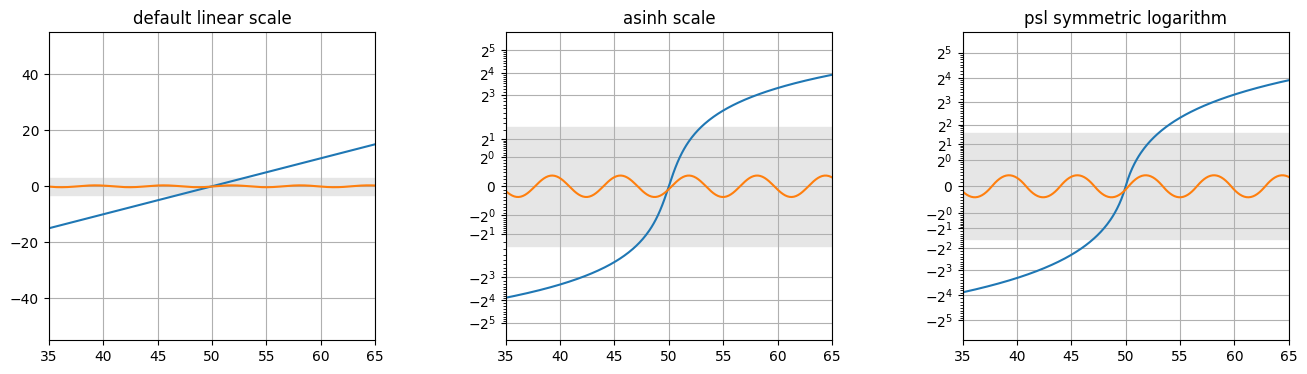

In [47]:
## Example x,y data: just a simple straight line, but now also include an additional sine wave.
x = np.arange(0, 100.0, 0.1)
y = np.arange(-50, 50, 0.1)
y2=np.sin(x)/3

fig = plt.figure(1,figsize=(16,4)) 

ax1 = plt.subplot(131); plt.title('default linear scale')
plt.plot(x,y); plt.plot(x,y2)
#plt.yscale('linear')

ax2 = plt.subplot(132); plt.title('asinh scale')
plt.plot(x,y); plt.plot(x,y2)
plt.yscale('asinh', base=2, linear_width=1); 

## This function to set symlog minor ticks also works for asinh scale!
psl.set_symmetriclog_minorticks(ax2, xy='y')

ax3 = plt.subplot(133); plt.title('psl symmetric logarithm')
plt.plot(x,y); plt.plot(x,y2)
plt.yscale('symmetriclog', base=2, shift=1)
## Similarly, you can also set the x-scale like so:
#ax3.set_xscale('symmetriclog',shift=1e0)

psl.set_symmetriclog_minorticks(ax3, xy='y', thresh=0.3)
#ax3.yaxis.set_major_locator(FixedLocator([-10,-1,0,1,10]))

for ax in [ax1, ax2, ax3]:
    ax.grid(True)
    ## Set the xlimits and ylimits to the same range for each subplot
    ax.set_ylim(-55,55)
    ax.set_xlim(35,65)
    ## Add some shading to emphasize the region of interest
    ax.axhspan(-3,3, color='0.9', zorder=-1)

plt.subplots_adjust(wspace=0.4)
#plt.savefig('symlog_symmetriclog.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

### The shift parameter for plotting <a name="shift"></a>

'shift' is the parameter that controls how wide or narrow the transition region is (because under the hood, the data are actually being shifted by this amount to achieve the smooth and continuous transition).  This is somewhat similar in practice to adjusting the 'linthresh' parameter in matplotlib's symlog in the sense that it results in the transition zone width, but there the scale changes to linear at that limit. 
For comparisons of pysymlog's symmetric_log to match the appearance of mpl symlog with similar range and stretch, a good rule of thumb is to use a symmetric_log shift value ~ 1/10 of the linthresh value you would use with symlog.  (For example, linthresh=0.1 would have similar overall appearance to shift=0.01.)

For symmetric log, if you want roughly even bins all the way through, use shift values in powers of 10.    e.g., 1, 0.1, 0.01...  
Generally, the last ticklabel denomination before 0 for power of 10 shift will be 10x the shift value -- e.g., for shift=0.01 (=10^-2), the ticklabels will be [..., 10^-1, 0, -10^-1 ...] So to include 1e-2 ticklabel, use shift=1e-3.
To make near-zero bins a bit more squished, to emphasize that those ranges are being compressed, try using a slightly higher fractional shift value that is not a power of 10 -- e.g., .3 or .5 instead of .1

Below is an example of plotting a straight line (in linear space, anyway) in symmetric log space using different values for the shift parameter.  As shift decreases with the axis limits staying the same, the data farther from zero get 'squished' more and more in order to highlight the steadily decreasing numerical range of the transition around zero.

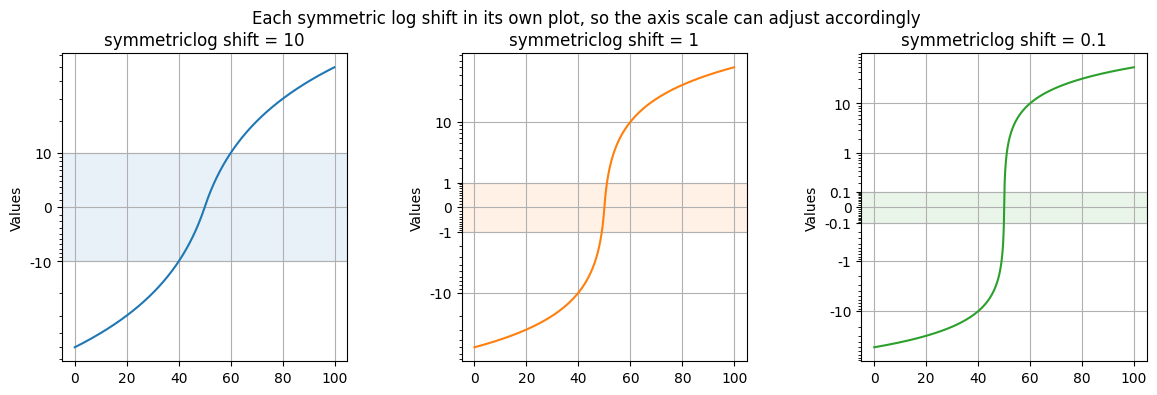

In [16]:
## Example x,y data -- a straight line in linear space
x = np.arange(0, 100.0, 0.1)
y = np.arange(-50, 50, 0.1)

## tan(x) also makes for an interesting example for large y-axis range
#dt2 = 0.01
#x2 = np.arange(-2, 5.0, dt2)
#y2 = np.tan(x2)

## Saving a list of the default colors, for convenience.
## Useful for giving the lines and shading the same color
## without manually specifying color codes.
default_colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig = plt.figure(1,figsize=(14,4))

ax1 = plt.subplot(131); plt.title('symmetriclog shift = 10')
ax2 = plt.subplot(132); plt.title('symmetriclog shift = 1')
ax3 = plt.subplot(133); plt.title('symmetriclog shift = 0.1')

for ax,s,i in zip([ax1,ax2,ax3],[10.,1.,0.1],[0,1,2]):
    #ax.plot(x[yposinds], y[yposinds], 'k--', label='Positive data only', zorder=10)
    ax.plot(x,y, color=default_colors[i])#, label='Full dataset');
    #ax.legend(loc='upper left')
    ax.grid(True)
    ax.set_ylabel('Values')
    ax.set_yscale('symmetriclog', shift=s)
    ax.axhspan(-s,s, color=default_colors[i], alpha=0.1, zorder=-1)

    ## Remake the major tick labels to not use scientific notation
    psl.reformat_major_ticklabels(ax, thresh=s)
    ##--> This could also be accomplished by the following
    #ax.yaxis.set_major_locator(FixedLocator([-100,-10,-1,0,1,10,100]))
    #ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:g}'.format(y)))
    
    
    psl.set_symmetriclog_minorticks(ax,xy='y',thresh=s)

plt.suptitle("Each symmetric log shift in its own plot, so the axis scale can adjust accordingly\n", y=0.99)
plt.subplots_adjust(wspace=0.4)
#plt.savefig('separate_shifts_separate_plots.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

> [!CAUTION]
> Do not mix your symlog shift (or base) values in a single plot axis!
> For example, don't plot data transformed using shift=1 in a subplot,
> then overplot another set of data in the same subplot using shift=0.1.
> (You can overplot as many datasets as you want using the same shift
> and base values though, of course.)
> The symmetric log scalings 'squish' and spread the data differently
> depending on the shift value used.  

### The thresh parameter for handling ticks <a name="thresh"></a>

For handling ticks, the 'thresh' parameter in ```psl.reformat_major_ticklabels()``` and ```psl.set_symmetriclog_minorticks()``` controls the threshold for plotting axis ticks.
For ```symmetric_log_decades()```, thresh similarly defines the lowest (absolute value) numerical scale to use in the generation of the list of decades.

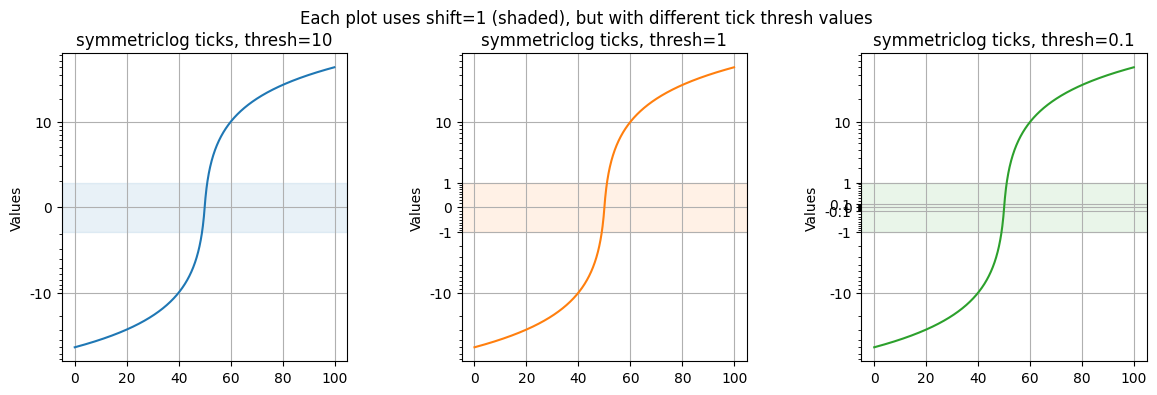

In [17]:
## Example x,y data -- a straight line in linear space
x = np.arange(0, 100.0, 0.1)
y = np.arange(-50, 50, 0.1)

## tan(x) also makes for an interesting example for large y-axis range
#dt2 = 0.01
#x2 = np.arange(-2, 5.0, dt2)
#y2 = np.tan(x2)

## Saving a list of the default colors, for convenience.
## Useful for giving the lines and shading the same color
## without manually specifying color codes.
default_colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig = plt.figure(1,figsize=(14,4))

ax1 = plt.subplot(131); plt.title('symmetriclog ticks, thresh=10')
ax2 = plt.subplot(132); plt.title('symmetriclog ticks, thresh=1')
ax3 = plt.subplot(133); plt.title('symmetriclog ticks, thresh=0.1')

for ax,t,i in zip([ax1,ax2,ax3],[10.,1.,0.1],[0,1,2]):
    #ax.plot(x[yposinds], y[yposinds], 'k--', label='Positive data only', zorder=10)
    ax.plot(x,y, color=default_colors[i])#, label='Full dataset');
    #ax.legend(loc='upper left')
    ax.grid(True)
    ax.set_ylabel('Values')
    ax.set_yscale('symmetriclog', shift=1.)
    ax.axhspan(-1,1, color=default_colors[i], alpha=0.1, zorder=-1)

    ## Remake the major tick labels to not use scientific notation
    psl.reformat_major_ticklabels(ax, thresh=t)
    ##--> This could also be accomplished by the following
    #ax.yaxis.set_major_locator(FixedLocator([-100,-10,-1,0,1,10,100]))
    #ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:g}'.format(y)))

    ## Set 
    psl.set_symmetriclog_minorticks(ax,xy='y')

plt.suptitle("Each plot uses shift=1 (shaded), but with different tick thresh values\n", y=0.99)
plt.subplots_adjust(wspace=0.4)
#plt.savefig('separate_thresh_separate_plots.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

### Error bars in symmetric log plots <a name="errorbars"></a>

Error bars can be annoying when plotting in log space - but not in symmetric log space!
There's nothing special you need to do for plotting error bars with pysymlog, simply plot error bars as you would for normal linear scale, then set the scale to 'symmetriclog'.  Easy peasy.
No more needing to worry about clipping the lower uncertainties if they go below zero!

Below is an example using tan(x) and assigning random normal errors.

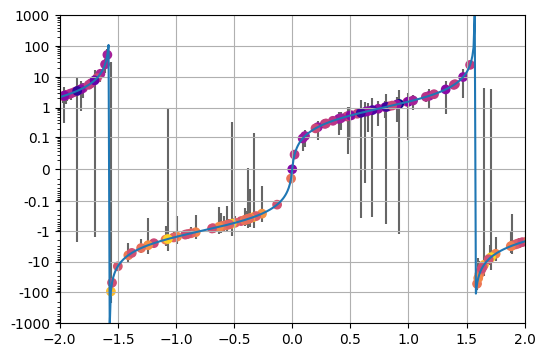

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pysymlog as psl
psl.register_mpl()

dt2 = 0.01
x2 = np.arange(-2, 5.0, dt2)
y2 = np.tan(x2)

## Generate random errors. In order to make an example here that 
#  highlights the behavior in the transition region, calculate 
#  them as  abs( random * yvalue / 1.5 )
yerrs2 = np.abs( np.random.randn(len(x2))*y2/1.5 )

## Pick 200 random data points to show the error bars for (reduces the plot clutter)
inds = np.random.choice(range(len(x2)), 200, replace=False)

fig=plt.figure(1,figsize=(6,4))

ax1=plt.subplot(111); 
ax1.plot(x2,y2);

## Plot the error bars in the usual way, no extra steps needed!
ax1.errorbar(x2[inds], y2[inds], yerr=yerrs2[inds], color='0.4', ls='none', zorder=-1)

## For fun, also overplot scatter points colored by the "Signal to noise" ratio 
ax1.scatter(x2[inds], y2[inds], c=np.array(yerrs2/y2)[inds], cmap='plasma_r',)

## Now simply set the y-scale
ax1.set_yscale('symmetriclog', shift=0.01)

## Setting the axis limits, if desired
ax1.set_ylim(-1e3,1e3)
ax1.set_xlim(-2.,2.)
ax1.grid(True)

## Setting the minor ticks to be visible, because I like them
psl.set_symlog_minorticks(ax1,xy='y',)
## Making the major tick labels more pleasing -- do this AFTER setting the axis scale
psl.reformat_major_ticklabels(ax1, xy='y')

#plt.savefig('symlog_linthresh_0.1_errorbars.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


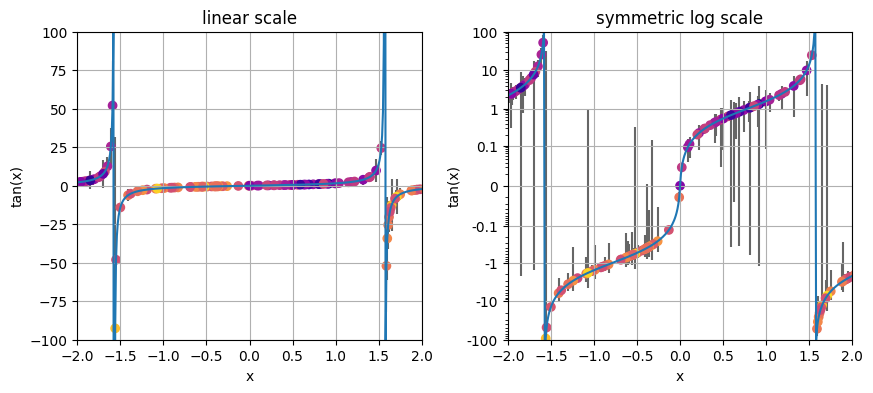

In [19]:
fig=plt.figure(1,figsize=(10,4))

ax1=plt.subplot(121); plt.title('linear scale')
ax2=plt.subplot(122); plt.title('symmetric log scale')

for ax in [ax1,ax2]:
    ax.plot(x2,y2);
    ## Plot the error bars in the usual way, no extra steps needed!
    ax.errorbar(x2[inds], y2[inds], yerr=yerrs2[inds], color='0.4', ls='none', zorder=-1)
    ## For fun, also overplot scatter points colored by the "Signal to noise" ratio 
    ax.scatter(x2[inds], y2[inds], c=np.array(yerrs2/y2)[inds], cmap='plasma_r',)
    
    ## Setting the axis limits to be the same in both, highlighting the difference
    ax.set_ylim(-1e2,1e2)
    ax.set_xlim(-2.,2.)
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('tan(x)')

ax2.set_ylim(-1e2,1e2)

## Now simply set the y-scale
ax2.set_yscale('symmetriclog', shift=0.01)
## Setting the minor ticks to be visible, because I like them
psl.set_symlog_minorticks(ax2,xy='y',)
## Making the major tick labels more pleasing -- do this AFTER setting the axis scale
psl.reformat_major_ticklabels(ax2, xy='y', tickvals='auto')

plt.subplots_adjust(wspace=0.25)
#plt.savefig('symlog_linthresh_0.1_errorbars_vslinear.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

### Histogram plots <a name="histplots"></a>

Creating histograms with symmetric log scaled bins is useful for displaying data that have interesting or relevant features across multiple orders of magnitude and span positive and negative values.  Examples could be offsets from some reference value, temperatures or similar data that happen to cross the arbitrarily defined zero point, data that follow distributions like Gaussian, Cauchy, etc., to name a few.  

Luckily, this is easy to do with pysymlog - simply input symmetric log transformed bins as input to numpy.histogram() or pyplot.hist() and set the scale of your desired axis.
Specifically, the basic steps using matplotlib/numpy are:
1. Provide the (symmetric log) transformed bins as input to the histogram function.
   
   psl.symmetric_logspace() is useful for making these.
  
2. Set the scale of the desired x/y axis to symmetric log scale. (Using the same "shift" parameter as for the bins)

Here is a simple example, using some cauchy random datapoints for the histogram:

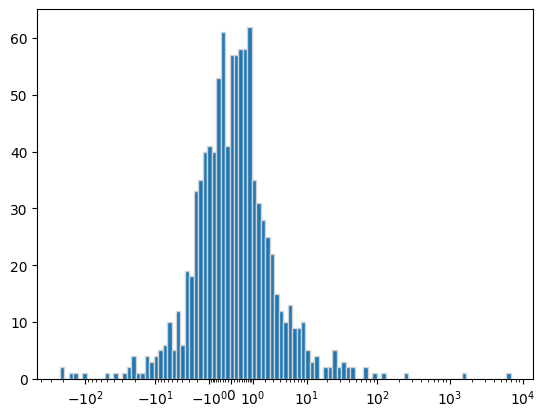

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pysymlog as psl
psl.register_mpl()

## Generate the example data
histdat = np.random.standard_cauchy(1000)
## and now generate some symlog-scaled bin edges to use for the histogram
symlogbins = psl.symmetric_logspace(histdat.min(), histdat.max(), N=101, shift=1)

plt.hist(histdat, bins=symlogbins, edgecolor='lightgray');
plt.xscale('symmetriclog', shift=1) #<-- Make sure you use the same shift here as for your bins! 

plt.show()
plt.clf(); plt.close('all')

In this example, standard log scaling of the bins is not ideal, because the negative values would not appear.  Of course, it's possible to treat the negative values manually by log-scaling their absolute values and plotting them in a secondary axis... But symmetric log scaling handles this without all the fuss.  

Here is an example comparing the above example data with bins in linear scale, standard log scale, and symmetric log scale, highlighting the negative values in a different color.  

/home/pjcigan/programs/conda-envs/py310/lib/python3.10/site-packages/pysymlog.py:241: RuntimeWarning: divide by zero encountered in log10
  decade_floor_base = np.around( np.log10(np.sign(lo)*lo) )
/home/pjcigan/programs/conda-envs/py310/lib/python3.10/site-packages/pysymlog.py:242: RuntimeWarning: divide by zero encountered in log10
  decade_ceil_base = np.around( np.log10(np.sign(hi)*hi) )
/home/pjcigan/programs/conda-envs/py310/lib/python3.10/site-packages/pysymlog.py:263: RuntimeWarning: invalid value encountered in scalar subtract
  for i in np.arange(decade_floor_base, decade_ceil_base+.1, 1):


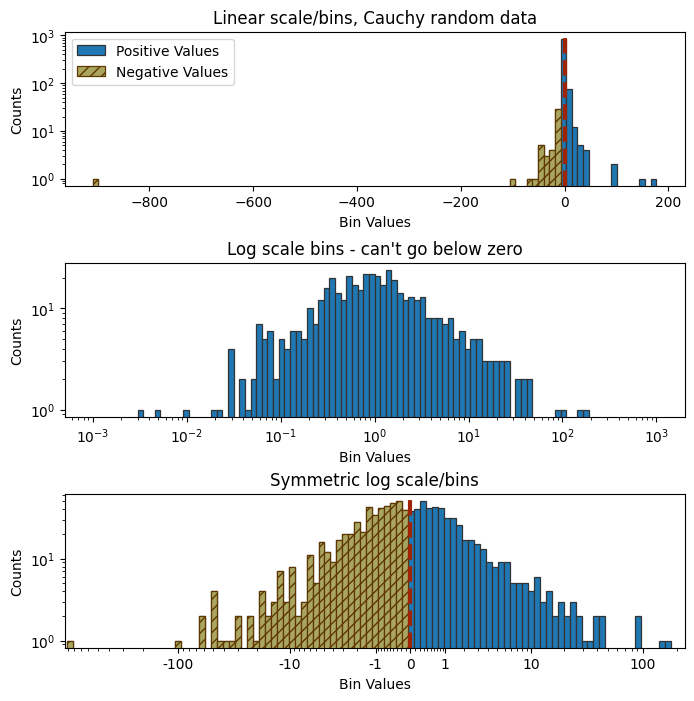

In [21]:
## Generate the example data
histdat = np.random.standard_cauchy(1000)
#negative values will become NaNs when log-transformed, so only use the positive values.  
log10dat = np.log10(histdat[histdat>0])

## Computing the bins for each scaling method
linearbins = np.linspace(histdat.min(), histdat.max(), 101)
logbins = np.linspace( np.floor(np.nanmin(log10dat)), np.ceil(np.nanmax(log10dat)), 101) 
symlogbins = psl.symmetric_logspace(histdat.min(), histdat.max(), 101, input_format='linear', shift=1, base=10)

fig = plt.figure(1, figsize=(8,8))

ax1=plt.subplot(311)
plt.hist(histdat, bins=linearbins, log=True, ec='0.2',lw=0.9, label='Positive Values'); 
plt.hist(histdat, bins=linearbins[linearbins<=0], fc='#AAA662', ec='#5F3700',lw=0.9, hatch='///', label='Negative Values')
plt.axvline(0, color='#9F2305', lw=3, ls='--')
ax1.legend()
plt.title('Linear scale/bins, Cauchy random data')

ax2=plt.subplot(312)
plt.hist(histdat, bins=10**logbins, log=True, ec='0.2',lw=0.9); 
ax2.set_xscale('log') 
plt.title("Log scale bins - can't go below zero")

ax3=plt.subplot(313)
plt.hist(histdat, bins=symlogbins, log=True, ec='0.2',lw=0.9); 
plt.hist(histdat, bins=symlogbins[symlogbins<=0], fc='#AAA662', ec='#5F3700',lw=0.9, hatch='///')
plt.axvline(0, color='#9F2305', lw=3, ls='--')
ax3.set_xscale('symmetriclog',shift=1) #<-- same shift value as for symmetric log bins
psl.reformat_major_ticklabels(ax3, xy='x', tickvals='auto', thresh=1)

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Bin Values')
    ax.set_ylabel('Counts')
plt.title('Symmetric log scale/bins')
plt.subplots_adjust(hspace=0.5)
#plt.savefig('histograms_negative_comparison.jpg', bbox_inches='tight', dpi=200)
plt.show();
plt.clf(); plt.close('all')


You are not limited to pyplot.hist() for generating your histograms.
Here is a demonstration of using pysymlog binning with numpy.histogram().
Again, like with the pyplot version, all you have to do is supply the symmetric log transformed bins as input.
(Note that the density keyword argument is also functional, for making histograms of count density.)

In this example, let's also manually constructing a plot with the resulting counts and bins using pyplot.bar().
It's possible to set it to plot from bin edges, but here is shown an additional step of calculating the bin centers in the symmetric log scaling.


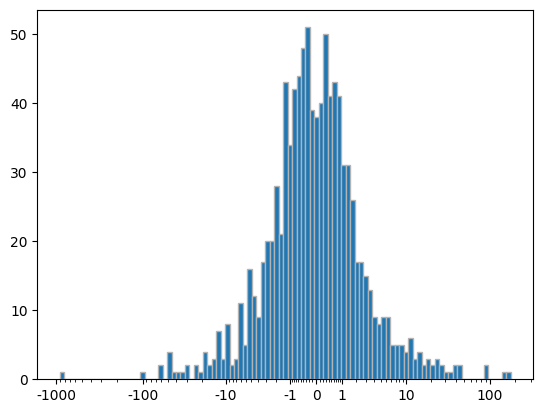

In [22]:
symlogbins = psl.symmetric_logspace(histdat.min(), histdat.max(), 101, shift=1)

## Using numpy.histogram(), which returns counts and bin edges
npcounts, npbins = np.histogram(histdat, bins=symlogbins) 
#npcounts, npbins = np.histogram(histdat, bins=symlogbins, density=True) 

## Calculating the bin centers 
center_bins = 0.5 * (symlogbins[:-1] + symlogbins[1:])
widths = np.diff(symlogbins)

ax1=plt.subplot(111)
ax1.bar(center_bins, npcounts, widths, edgecolor='0.7')
ax1.set_xscale('symmetriclog', shift=1) #Make sure to use the same shift value as your bins!
psl.reformat_major_ticklabels(ax1, tickvals='auto', xy='x', thresh=1)

plt.show();
plt.clf(); plt.close('all')

There are convenience functions built in to pysymlog to create histogram data with symmetric log scale bins, and to plot with matplotlib (and with plotly, which is covered in another tutorial).
Here are examples of their usage:

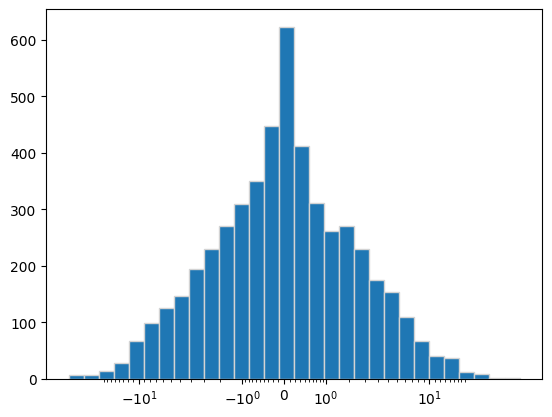

In [23]:
#testdat = np.tan( np.concatenate([np.logspace(-4,2, 1000),-np.logspace(-4,2, 1000)]) )
testdat = np.random.exponential(scale=3, size=5000)*np.random.randn(5000)

## Calculating histogram counts and bins, similar to using numpy.histogram()
ncounts,symlogbins = psl.symlogbin_histogram(testdat, 101, limits=['auto','auto'], shift=1, base=10, density=False);

countdensities,symlogbins2 = psl.symlogbin_histogram(testdat, 101, limits=[-1e-5,1e3], shift=1e-4, base=10, density=True);

## Plotting histograms with symmetric log scale bins, using the convenience function
ax1 = plt.subplot(111)
counts,symlogbins,patches = psl.symlogbin_hist_mpl(ax1, testdat, 30, edgecolor='lightgray')
plt.show()
plt.clf(); plt.close('all')


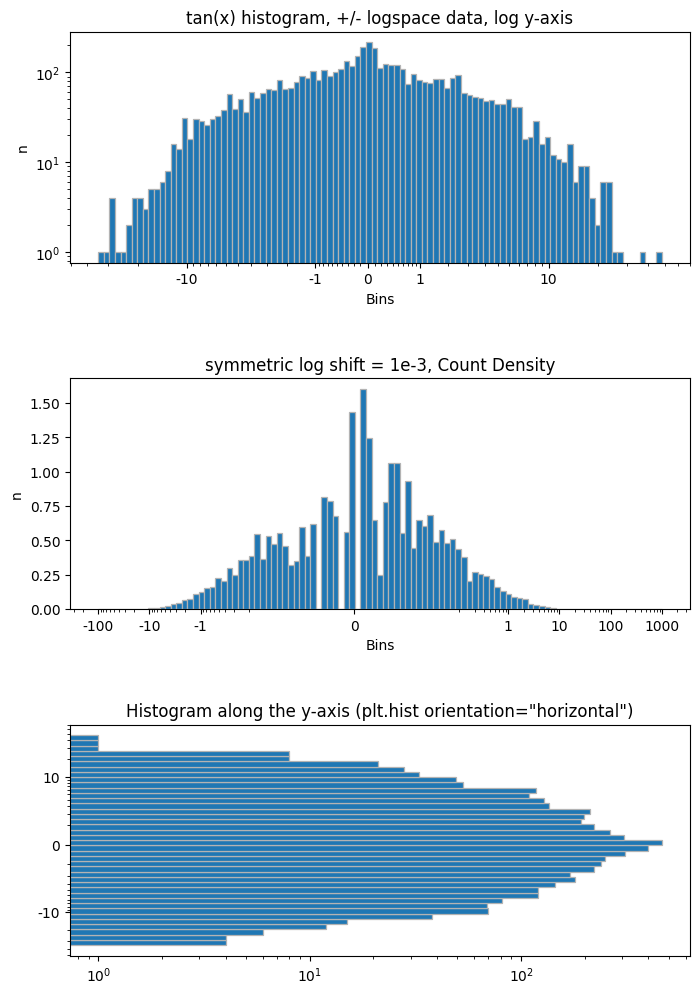

In [24]:
## Under the hood, pysymlog is calling pyplot.hist(), so you can use any of those keyword args too, such as weights, etc...

## Another example, showing different options
fig = plt.figure(1,figsize=(8,12))

## 
ax1 = plt.subplot(311); plt.title('tan(x) histogram, +/- logspace data, log y-axis')
psl.symlogbin_hist_mpl(ax1, testdat, 101, log=True, ec='0.7', lw=0.9)

## Different shift value, and plotting count density
ax2 = plt.subplot(312); plt.title('symmetric log shift = 1e-3, Count Density')
psl.symlogbin_hist_mpl(ax2, testdat, 101, limits=[-1e2,1e3], shift=1e-3, density=True, ec='0.7', lw=0.9)
psl.reformat_major_ticklabels(ax2, xy='x', tickvals='auto')

for ax in [ax1,ax2]:
    ax.set_xlabel('Bins')
    ax.set_ylabel('n')
    psl.reformat_major_ticklabels(ax, xy='x', thresh=1)

## Histogram along the y-axis
ax3 = plt.subplot(313); plt.title('Histogram along the y-axis (plt.hist orientation="horizontal")')
psl.symlogbin_hist_mpl(ax3, testdat, 40, orientation='horizontal', log=True, ec='0.7', lw=0.9)
psl.reformat_major_ticklabels(ax3, xy='y', tickvals='auto')

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.clf(); plt.close('all')

Even if there are no negative values in your data, symmetric log scaling can still be quite useful in cases where you have many values of zero that you also want to represent, or you simply desire your scale to include zero. 
Here is an example for the above example of Cauchy random data, but now with many extra entries of zero appended on the array.  These could represent recorded measurements of offsets from a reference value, etc.

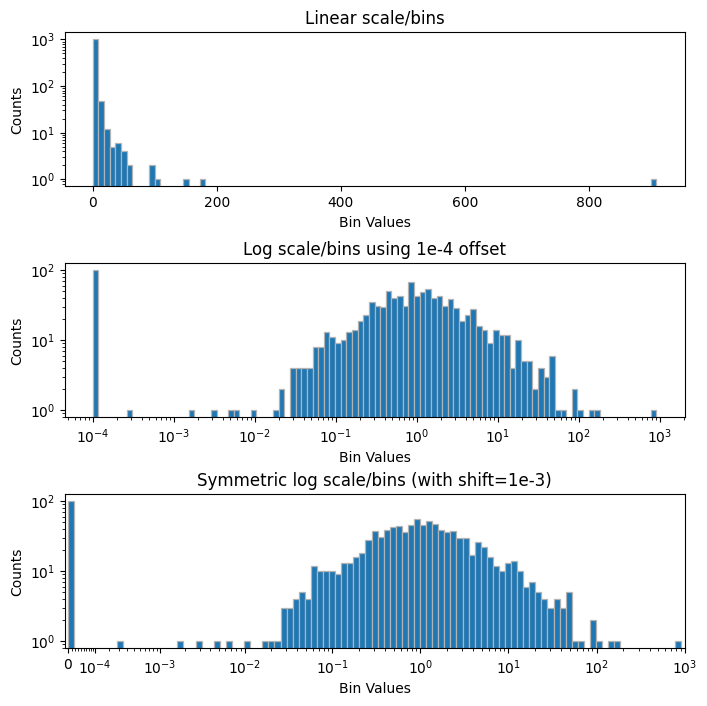

In [25]:
## Now using the absolute value of the 1000 random data points, with 100 extra zeroes appended
histdat2 = np.hstack( [np.abs(histdat), np.zeros(100)] )

## For the standard log10 of the data, we still want to represent the zeroes - 
#  one simple way is to offset the zeroes by some negligible amount below
#  the rest of the data. In this case, 1e-4 works well. 
#  You can either add 1e-4 to the entire dataset (easy, and that tiny offset
#  shouldn't affect the other data many order of magnitudes larger, but is
#  still modifying it nonetheless) or clipping the data at that offset value.
#logoffsetdat = np.log10(histdat2+1e-4)
logoffsetdat = np.log10( histdat2.clip(1e-4) )

linearbins = np.linspace(histdat2.min(), histdat2.max(), 101)
logoffsetbins = np.linspace(np.nanmin(logoffsetdat), np.nanmax(logoffsetdat), 101)
symlogbins = psl.symmetric_logspace(histdat2.min(), histdat2.max(), 101, shift=1e-4, )#input_format='linear', base=10)

fig = plt.figure(1, figsize=(8,8))

ax1=plt.subplot(311)
plt.hist(histdat2, bins=linearbins, log=True, ec='0.7', lw=0.9); 
plt.title('Linear scale/bins')

ax2=plt.subplot(312)
#plt.hist(logoffsetdat, bins=logoffsetbins, log=True); 
plt.hist(10**logoffsetdat, bins=10**logoffsetbins, log=True, ec='0.7', lw=0.9); 
ax2.set_xscale('log')
#ax2.set_xlim(1e-4, 2e3)
plt.title('Log scale/bins using 1e-4 offset')

ax3=plt.subplot(313)
plt.hist(histdat2, bins=symlogbins, log=True, ec='0.7', lw=0.9); 
ax3.set_xscale('symmetriclog',shift=1e-4)
ax3.set_xlim(-1e-5, 1e3) #Setting these limits helps it look more tidy 

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Bin Values')
    ax.set_ylabel('Counts')
plt.title('Symmetric log scale/bins (with shift=1e-3)')
#plt.suptitle('abs(Cauchy random data) plus zeroes', y=.99)
plt.subplots_adjust(hspace=0.5)
plt.show();
plt.clf(); plt.close('all')

### 2D plots <a name="2D"></a>

2D plots can also benefit from log scaling for both positive and negative values.  Position offsets, simulated data, or other results that have distributions spanning through zero over multiple scales are good examples. Perhaps many values are clustered around zero (like a gaussian or Cauchy distribution) and you want to highlight differentiation on the very small scales as well as on the larger scales.  Symmetric log scale can help.

Here is an example of a 2D symmetric random exponential distribution of datapoints, comparing a plot in linear scale and in symmmetric log scale.  The transition region of the symmetric log "shift" (here, between [-1,1] for each axis) is demarked by thin grey lines in x and y.

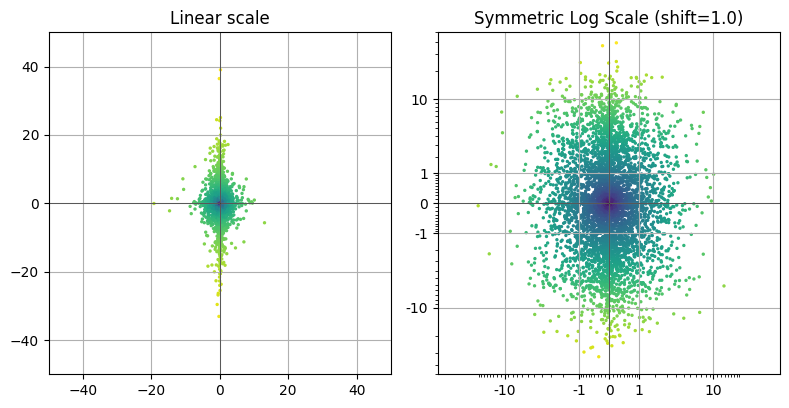

In [26]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
import pysymlog as psl
psl.register_mpl()

### Simulate log distribution of position differences -- dX,dY having positive and negative values following exponential dist around zero
dx2 = np.random.exponential(scale=1, size=5000)*np.random.randn(5000)
dy2 = np.random.exponential(scale=3, size=5000)*np.random.randn(5000)

## Making an array of the distances from the origin, to color the points for illustration purposes
dist = np.hypot(dx2,dy2)
#distcolors = np.power(dist,.3) 
distcolors = psl.symmetric_logarithm(dist, shift=.1)

fig=plt.figure(1, figsize=(8,4))
ax1=plt.subplot(121, aspect=1); plt.title('Linear scale')
ax1.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')#, color='0.1'

ax2=plt.subplot(122, aspect=1); plt.title('Symmetric Log Scale (shift=1.0)')
ax2.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')#, color='0.1'
ax2.set_xscale('symmetriclog',shift=1.)
ax2.set_yscale('symmetriclog',shift=1.)

psl.reformat_major_ticklabels(ax2, xy='both', tickvals='auto', thresh=1)
#psl.reformat_major_ticklabels(ax2, xy='both', tickvals=[-100,-10,-1,0,1,10,100])

for ax in [ax1,ax2]:
    ax.axvline(0,color='0.2',lw=0.5); ax.axhline(0,color='0.2',lw=0.5);
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    ax.grid(True)

plt.tight_layout()
#plt.savefig('2Doffsets_linear_symmetriclog.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


This next example helps illustrate some potential limitations of the linear-interior symlog scale in matplotlib.  Here is a comparison of the symlog scale with a threshold (where linear scale takes over) of 1.0, and the symmetriclog scale implemented here, using a shift of 1.0.  The symlog "linthresh" and symmetriclog "shift" are not equivalents as mentioned above (shift=0.1 will give similar results to linthresh=1.0 for the region outside the transition zone), but it is still useful to compare them for similar values.  For the symlog scale plot on the left, this choice of linear threshold (highlighted by the light grey box) is clearly not an ideal choice - while a threshold of 1.0 stretches more central points outward, the sudden change at the boundary of this distribution of points makes it appear to be arranged in 'blocks', although this is purely an artifact of the scaling.  Once again, the box containing the transition zone through zero for each scale is highlighted by light grey.

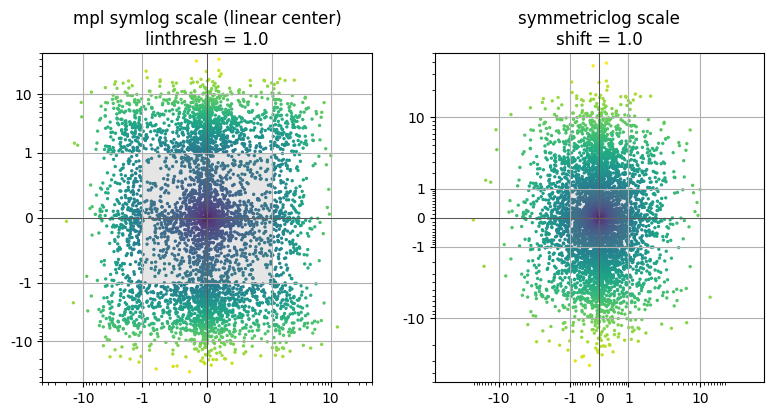

In [27]:
### Comparing matplotlib symlog (linear) vs symmetric log (smooth)
fig=plt.figure(1, figsize=(8,4))

ax1=plt.subplot(121, aspect=1); plt.title('mpl symlog scale (linear center)\nlinthresh = 1.0')

ax1.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')
ax1.set_xscale('symlog', linthresh=1.)# default, linthresh=1.0
ax1.set_yscale('symlog', linthresh=1.)
psl.set_symlog_minorticks(ax1,xy='both',)
psl.reformat_major_ticklabels(ax1, xy='both', tickvals=[-10,-1,0,1,10])

ax2=plt.subplot(122, aspect=1); plt.title('symmetriclog scale\nshift = 1.0')
ax2.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')
ax2.set_xscale('symmetriclog',shift=1.)
ax2.set_yscale('symmetriclog',shift=1.)
#psl.reformat_major_ticklabels(ax2, xy='both', tickvals=[-10,-1,0,1,10])
psl.reformat_major_ticklabels(ax2, xy='xy', tickvals='auto', thresh=1)

for ax,s in zip([ax1,ax2],[1.0,1.]):
    ax.axvline(0,color='0.2',lw=0.5); ax.axhline(0,color='0.2',lw=0.5);
    ax.fill_between(np.array([-s,s]), -s, s, facecolor='0.5', alpha=0.2, zorder=4)
    ax.plot([-s,-s,s,s,-s], [-s,s,s,-s,-s], color='0.7', zorder=5, lw=0.5)
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    ax.grid(True)

plt.tight_layout()
#plt.savefig('2Doffsets_symlog1.0_symmetriclog1.0.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')

This next plot shows a view of the exact same data with slightly different transition parameters that are more reasonable for the data considered here -- linthresh=3.0 for the symlog and shift = 0.3 for the symmetriclog.  This is closer to the natural comparison point between the two (linthresh/shift = 10) as mentioned earlier.  Increasing the symlog linthresh value means fewer inner points are stretched outward, so the apparent blockiness is reduced, but so too is the utility of viewing the inner data in log scale.  The lower symmetriclog shift value on the right has the potential to introduce more apparent distortion in the inner regions, but even here reducing the value by a factor of ~3 still yields reasonable results.

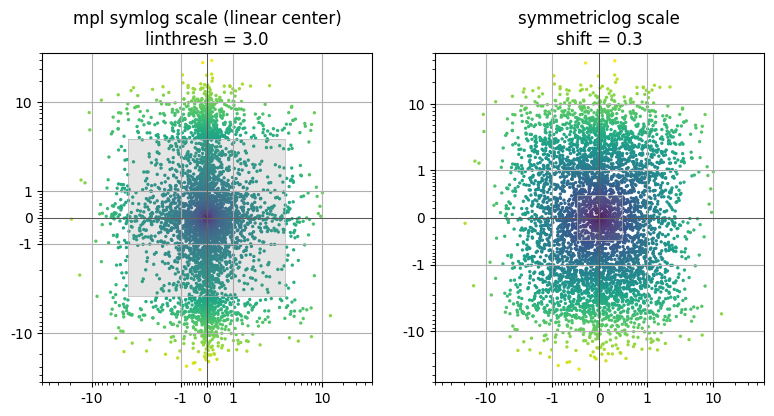

In [28]:
fig=plt.figure(1, figsize=(8,4))

ax1=plt.subplot(121, aspect=1); plt.title('mpl symlog scale (linear center)\nlinthresh = 3.0')
ax1.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')
ax1.set_xscale('symlog', linthresh=3.)# default, linthresh=1.0
ax1.set_yscale('symlog', linthresh=3.)
psl.set_symlog_minorticks(ax1,xy='both',)

ax2=plt.subplot(122, aspect=1); plt.title('symmetriclog scale\nshift = 0.3')
ax2.scatter(dx2,dy2, s=2, c=distcolors, cmap='viridis')
ax2.set_xscale('symmetriclog',shift=0.3)
ax2.set_yscale('symmetriclog',shift=0.3)

for ax,s in zip([ax1,ax2],[3.0,0.3]):
    psl.reformat_major_ticklabels(ax, xy='both', tickvals=[-10,-1,0,1,10])
    ax.axvline(0,color='0.2',lw=0.5); ax.axhline(0,color='0.2',lw=0.5);
    ax.fill_between(np.array([-s,s]), -s, s, facecolor='0.5', alpha=0.2, zorder=4)
    ax.plot([-s,-s,s,s,-s], [-s,s,s,-s,-s], color='0.7', zorder=5, lw=0.5)
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    ax.grid(True)

plt.tight_layout()
#plt.savefig('2Doffsets_symlog3.0_symmetriclog0.3.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


Now getting a bit more fancy - a 2D scatter plot with histograms (marginal distributions) of the data in each axis.  A colorbar is also included, here set as the log10 offset from zero.

/tmp/ipykernel_2620884/3847536219.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_histy.set_xticklabels(ax_histy.get_xticklabels(), rotation=-90)


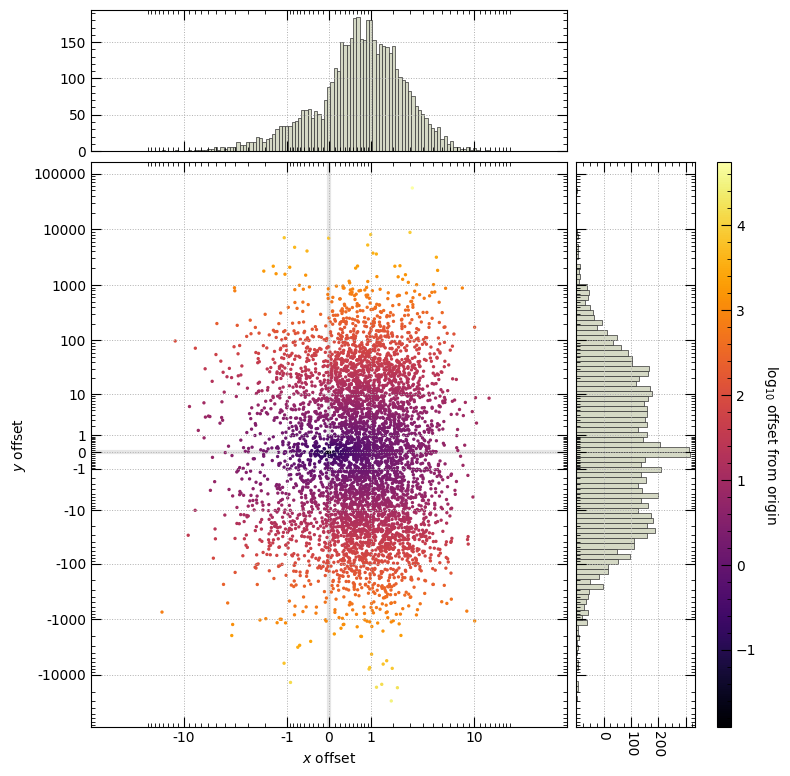

In [29]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Updating rcParams to some personal preferences
plt.rcParams.update({'xtick.major.size':7, 'ytick.major.size':7, 'xtick.minor.size':3, 'ytick.minor.size':3, 'grid.linestyle':':', 'grid.linewidth':0.7, 
                     'xtick.direction':'in', 'ytick.direction':'in', 'xtick.minor.visible':True, 'ytick.minor.visible':True, 'xtick.top':True, 'ytick.right':True})

dx3 = np.random.exponential(scale=1, size=5000)*np.random.randn(5000) + np.random.gamma(1,size=5000)
dy3 = np.random.exponential(scale=3, size=5000)*np.random.randn(5000) * np.random.standard_cauchy(5000)*10

dist = np.hypot(dx3,dy3)
distcolors = np.log10(dist)

fig1=plt.figure(1, figsize=(8,8))

ax1=plt.subplot(111)
scat = ax1.scatter(dx3,dy3, s=2, c=distcolors, cmap='inferno')
ax1.set_xscale('symmetriclog',shift=1.)
ax1.set_yscale('symmetriclog',shift=1.)

## Make histograms for each axis
ax_histx = ax1.inset_axes([0,1.02,1,0.25], sharex=ax1)
ax_histy = ax1.inset_axes([1.02,0,0.25,1], sharey=ax1)
#ax_histx.histogram(....) #or, use the pysymlog convenience functions, like so:
psl.symlogbin_hist_mpl(ax_histx, dx3, 101, fc='#D5D9C5', ec='0.2',lw=0.5)#limits=[-1e2,1e3], shift=1e-3, density=True)
psl.symlogbin_hist_mpl(ax_histy, dy3, 101, orientation='horizontal', fc='#D5D9C5', ec='0.2',lw=0.5)#limits=[-1e2,1e3], shift=1e-3, density=True)
ax_histx.tick_params(axis='x', labelbottom=False, top=True, which='both')
ax_histy.tick_params(axis='y', labelleft=False, right=True, which='both')
ax_histy.set_xticklabels(ax_histy.get_xticklabels(), rotation=-90)
ax_histx.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune='lower'))
ax_histy.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune='lower'))

## Also make a colorbar
cax = make_axes_locatable(ax1).append_axes('right', size='3%', pad=1.5)
#ax1pos = ax1.get_position()
#cax = fig1.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
#*** figure out how to get to add cax without squishing or goiong off edge again... 
#   --> fig1, axes1 = plt.subplots(1,1, layout='constrained', figsize=(8,8))  instead of plt.subplot????
#axpos = ax_histy.get_position()
#cax = fig1.add_axes([axpos.x1+0.01, axpos.y0, 0.03, axpos.height])
#cax = ax1.inset_axes([axpos.x1+0.01, axpos.y0, 0.03, axpos.height], transform=ax1.transAxes)
cbar = plt.colorbar(scat, cax=cax, shrink=0)
cbar.set_label('log$_{10}$ offset from origin', rotation=-90, va='bottom', size=10)

psl.reformat_major_ticklabels(ax1, xy='both', tickvals='auto', thresh=1,)# fmt='{:g}')
#psl.set_symmetriclog_minorticks(ax1, xy='both', thresh=.1)

ax1.axvline(0, color='0.9', lw=3, zorder=-1)
ax1.axhline(0, color='0.9', lw=3, zorder=-1)
ax1.set_xlim(-50,50)
ax1.grid(True)
ax_histx.grid(True)
ax_histy.grid(True)
ax1.set_xlabel('$x$ offset')
ax1.set_ylabel('$y$ offset')
#plt.suptitle('Random data, symmetric log scale')
plt.tight_layout()
#plt.savefig('2Doffsets_with_hists.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


### Colorbar and cmap normalization   <a name="colornorm"></a>

You can also use psymlog for symmetric log scaled colorbars, demonstrated here, comparing symlog color scaling vs linear color scaling for data that span many orders of magnitude and include negatives.

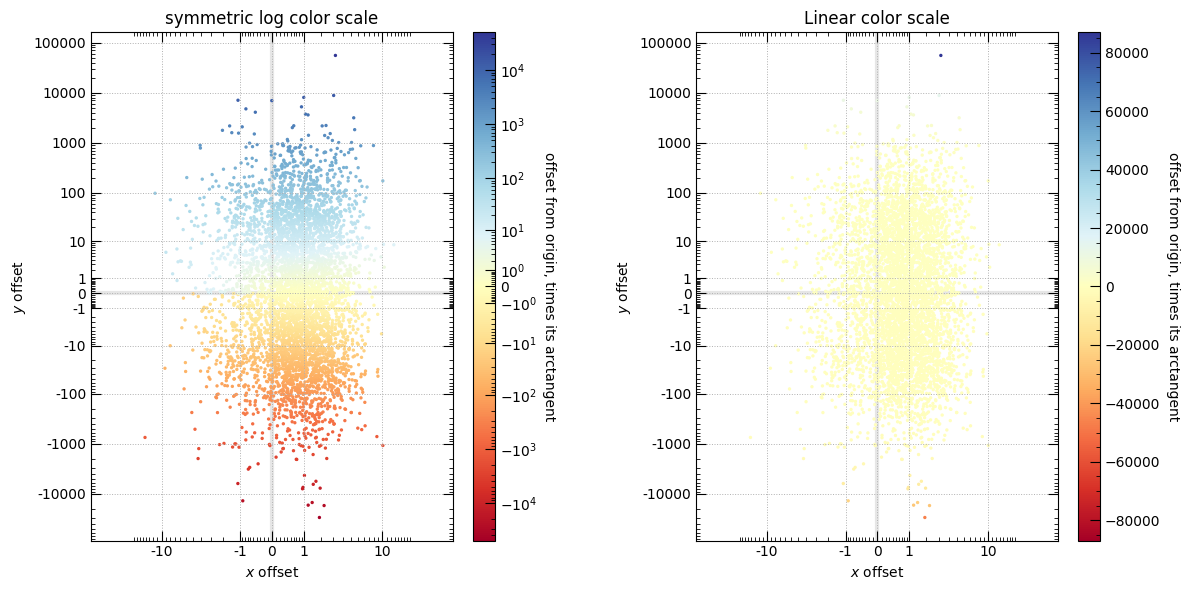

In [31]:
from matplotlib.colors import CenteredNorm

distcolors_arctan = dist*np.arctan2(dy3,dx3)

fig1=plt.figure(1, figsize=(12,6))#, layout='constrained')

ax1=plt.subplot(121); plt.title('symmetric log color scale')
#linearsymlognorm = mpl.colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1000.0, vmax=1000.0, base=10)
pslnorm = psl.SymmetricLogarithmNorm(shift=1, vmin=-5e4, vmax=5e4, base=10)
scat = ax1.scatter(dx3,dy3, s=2, c=distcolors_arctan, cmap='RdYlBu', norm=pslnorm)#, color='0.1'

cax = make_axes_locatable(ax1).append_axes('right', size='6%', pad=0.2)
cbar = plt.colorbar(scat, cax=cax, shrink=0)
cbar.set_label('offset from origin, times its arctangent', rotation=-90, va='bottom', size=10)
## Easily set the minor ticklabels on the colorbar:
psl.set_symmetriclog_minorticks(cax,xy='y')

ax2=plt.subplot(122); plt.title('Linear color scale')
scat2 = ax2.scatter(dx3,dy3, s=2, c=distcolors_arctan, cmap='RdYlBu', norm=CenteredNorm() )
cax2 = make_axes_locatable(ax2).append_axes('right', size='6%', pad=0.2)
cbar2 = plt.colorbar(scat2, cax=cax2, shrink=0)
cbar2.set_label('offset from origin, times its arctangent', rotation=-90, va='bottom', size=10)

for ax in [ax1,ax2]:
    ax.set_xscale('symmetriclog',shift=1.)
    ax.set_yscale('symmetriclog',shift=1.)
    psl.reformat_major_ticklabels(ax, xy='both', tickvals='auto', thresh=1,)
    ax.axvline(0, color='0.9', lw=3, zorder=-1)
    ax.axhline(0, color='0.9', lw=3, zorder=-1)
    ax.set_xlim(-50,50)
    ax.grid(True)
    ax.set_xlabel('$x$ offset')
    ax.set_ylabel('$y$ offset')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
#plt.savefig('2Doffsets_cbar_norm.jpg', bbox_inches='tight')
plt.show(); 
plt.clf(); plt.close('all')


### reset rcParams to defaults
plt.rcdefaults()

### 2D histograms with symmetric log scaling  <a name="2Dhistplots"></a>

You can easily create two-dimensional histograms or heatmaps with symmetric log axes as well using ```psl.symlogbin_histogram2d``` .  Here is an example of some 2D (x-y) random exponential data shown as heatmaps with axes in linear scale vs in symmetric log scale.

The general procedure is 
* define your symmetric log scale bins in each axis direction
* calculate the 2D histogram values for those bins
* create a meshgrid of X,Y values (e.g. with numpy.meshgrid )
* plot the meshgrid X,Y and histogram values with pyplot.pcolormesh

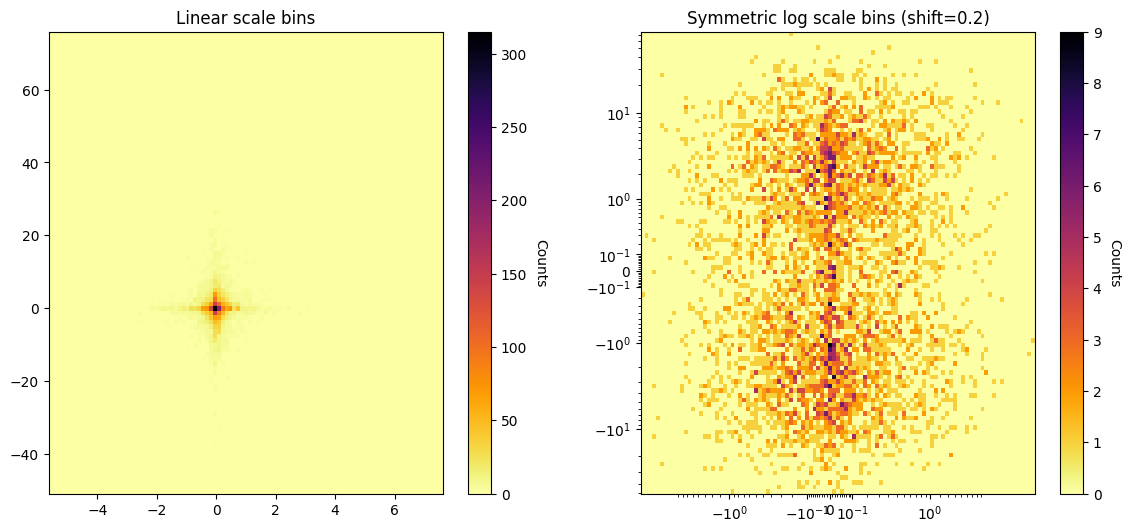

In [32]:
import numpy as np
import matplotlib.pyplot as plt

import pysymlog as psl
psl.register_mpl()

## Generate some sample data
dx = np.random.exponential(scale=0.5, size=5000)*np.random.randn(5000)
dy = np.random.exponential(scale=5, size=5000)*np.random.randn(5000)

#101 bins in linear space
linearbincounts, linearbins_x, linearbins_y = np.histogram2d(dx,dy, bins=101)

# 101 auto-calculated symmetric log bins in each of x,y directions, and a shift of 0.3
hcounts, bins_x, bins_y = psl.symlogbin_histogram2d(dx,dy, Nbins=101, limits=['auto','auto'], shift=0.2)


fig1 = plt.figure(1, figsize=(14,6))

ax1 = plt.subplot(121); plt.title('Linear scale bins')

## Make a meshgrid of the X,Y edges 
# --> can just use the output of np.histogram2d directly
X1, Y1 = np.meshgrid(linearbins_x, linearbins_y)
img1 = ax1.pcolormesh(X1, Y1, linearbincounts.T, cmap='inferno_r') #Remember to transpose the histogram array
## add a colorbar
cbar1 = plt.colorbar(img1, ax=ax1)
cbar1.set_label('Counts', rotation=-90, va='bottom', size=10)

ax2 = plt.subplot(122); plt.title('Symmetric log scale bins (shift=0.2)')

## Make a meshgrid of the X,Y edges 
# --> can just use the output of psl.symlogbin_histogram2d directly
X2, Y2 = np.meshgrid(bins_x, bins_y)
img2 = ax2.pcolormesh(X2, Y2, hcounts.T, cmap='inferno_r') #Remember to transpose the histogram array

## add a colorbar
cbar2 = plt.colorbar(img2, ax=ax2)
cbar2.set_label('Counts', rotation=-90, va='bottom', size=10)
## Set the x,y axes to symmetriclog scale
ax2.set_xscale('symmetriclog',shift=0.2)
ax2.set_yscale('symmetriclog',shift=0.2)

plt.subplots_adjust(wspace=0.2)
plt.show(); 
plt.clf(); plt.close('all')


Here is an example using the same random data, comparing the use of a scatter plot vs a 2D histogram/heatmap to display the data.  

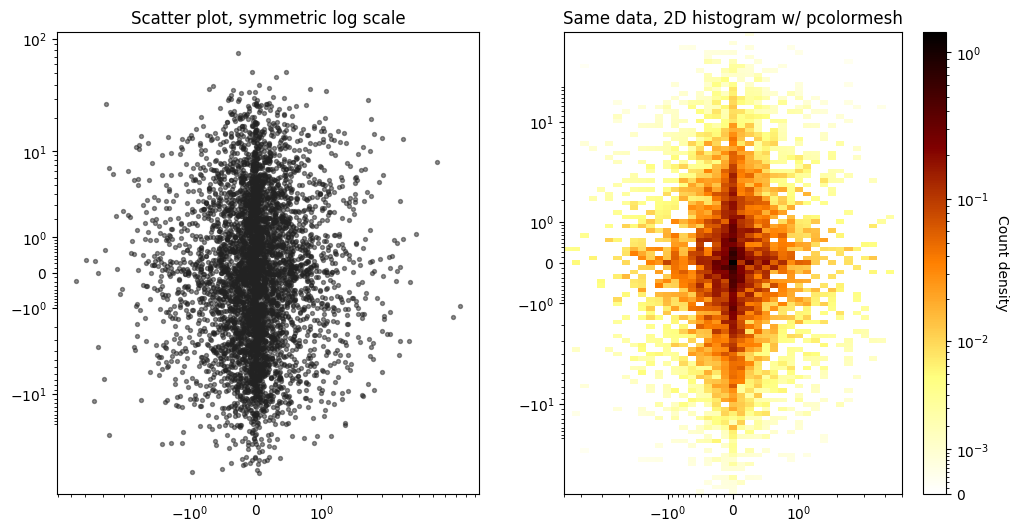

In [33]:

fig1=plt.figure(1, figsize=(12,6))

# 41 bins in x, 101 bins in y, and returning count density
hcount_densities,bins_x2, bins_y2 = psl.symlogbin_histogram2d(dx,dy, [41,101], limits=[[-5,5],[-50,50]], shift=1, density=True)

## First, make a reference scatter plot of the values
ax1=plt.subplot(121); ax1.set_title('Scatter plot, symmetric log scale')
ax1.scatter(dx,dy, s=8, c='#222222', alpha=0.5)

## Next, make the 2D histogram
ax2 = plt.subplot(122); ax2.set_title('Same data, 2D histogram w/ pcolormesh')
X, Y = np.meshgrid(bins_x2, bins_y2)

## Adjusting the colorbar normalization. 
norm = psl.SymmetricLogarithmNorm(shift=1e-3)#,vmin=0, vmax=.7)
#from matplotlib.colors import LogNorm, SymLogNorm, AsinhNorm
#norm = LogNorm()
#norm = SymLogNorm(linthresh=1e-3)#,vmin=0, vmax=.7)
#norm = AsinhNorm(linear_width=1e-3)#,vmin=0, vmax=.7)

img = ax2.pcolormesh(X,Y,hcount_densities.T, cmap='afmhot_r', norm=norm)

cbar = plt.colorbar(img, ax=ax2)
cbar.set_label('Count density', rotation=-90, va='bottom', size=10)

for ax in [ax1,ax2]:
    ax.set_xscale('symmetriclog',shift=1)
    ax.set_yscale('symmetriclog',shift=1)

plt.show(); 
plt.clf(); plt.close('all')

Making contour and contourf plots instead of pcolormesh works in a similar way - generate the X,Y meshgrid of points, however now they are expected to be the bin centers (not edges). 

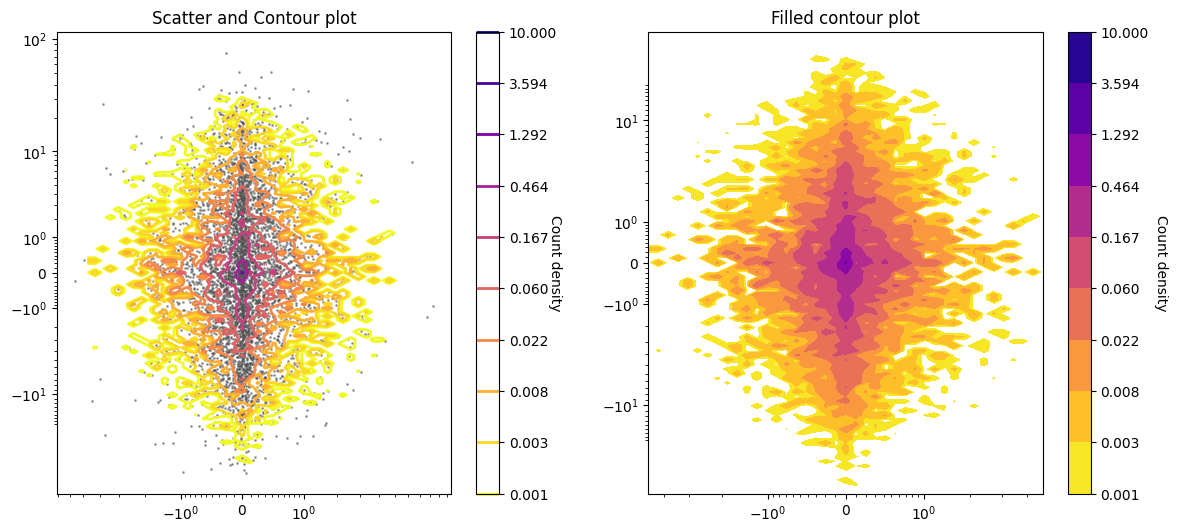

In [34]:

## Make the histogram values and bins
hcount_densities,bins_x2, bins_y2 = psl.symlogbin_histogram2d(dx,dy, [41,101], limits=[[-5,5],[-50,50]], shift=1, density=True)

## Make the meshgrid of bin centers
center_bins_x = 0.5 * (bins_x2[:-1] + bins_x2[1:])
center_bins_y = 0.5 * (bins_y2[:-1] + bins_y2[1:])

Xcent, Ycent = np.meshgrid(center_bins_x, center_bins_y)

## Colorbar normalization. 
norm = psl.SymmetricLogarithmNorm(shift=1e-3)#,vmin=0, vmax=.7)

fig1=plt.figure(1, figsize=(14,6))

ax1=plt.subplot(121); plt.title('Scatter and Contour plot')
ax1.scatter(dx,dy, s=1, c='#555555', alpha=0.5)
conts = ax1.contour(Xcent, Ycent, hcount_densities.T, cmap='plasma_r', norm=norm, levels=np.logspace(-3,1,10), linewidths=2)
#                   extent=[center_bins_x.min(),center_bins_x.max(), center_bins_y.min(), center_bins_y.max()] )
cbar1 = plt.colorbar(conts, ax=ax1)
cbar1.set_label('Count density', rotation=-90, va='bottom', size=10)

ax2=plt.subplot(122); plt.title('Filled contour plot')
conts_f = ax2.contourf(Xcent, Ycent, hcount_densities.T, cmap='plasma_r', norm=norm, levels=np.logspace(-3,1,10))
cbar2 = plt.colorbar(conts_f, ax=ax2)
cbar2.set_label('Count density', rotation=-90, va='bottom', size=10)

for ax in [ax1,ax2]:
    ax.set_xscale('symmetriclog',shift=1)
    ax.set_yscale('symmetriclog',shift=1)

plt.show(); 
plt.clf(); plt.close('all')

### Locators and Formatters - controlling ticks  <a name="locators"></a>

Axis ticks and ticklabels in matplotlib are typically managed with [matplotlib.ticker.Locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) (for computing where the ticks get plotted) and [matplotlib.ticker.Formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) (how the tick labels are displayed). By default, minor ticks are not displayed in log scale, but this can be changed relatively easily.

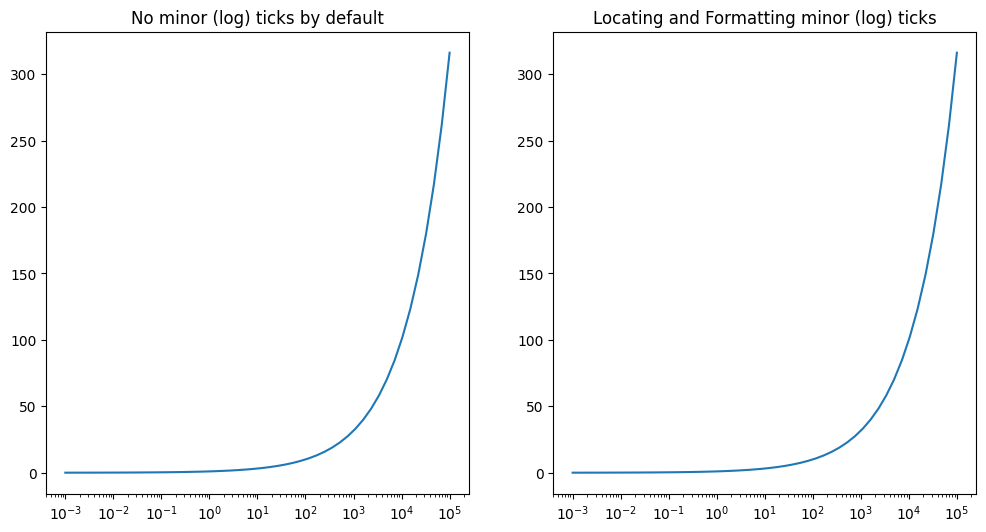

In [35]:
logdat = np.logspace(-3,5)

import matplotlib.ticker as ticker
plt.rcdefaults() #Just ensuring default pyplot rcParams for this example

fig=plt.figure(1, figsize=(12,6))

ax1 = plt.subplot(121); plt.title('No minor (log) ticks by default')
plt.plot(logdat, np.sqrt(logdat))
ax1.set_xscale('log')

ax2 = plt.subplot(122); plt.title('Locating and Formatting minor (log) ticks')
plt.plot(logdat, np.sqrt(logdat))
ax2.set_xscale('log')
ax2.xaxis.set_minor_locator( ticker.LogLocator(base = 10.0, subs=np.arange(1.0, 10.0)*.1, numticks=10) ) 
ax2.xaxis.set_minor_formatter(ticker.NullFormatter())

plt.show()
plt.clf(); plt.close('all')

Recently matplotlib has also included a SymmetricalLogLocator for finding ticks with their (linear) symlog scale. 

pysymlog makes this even easier with the inclusion of new functionality for Locating minor ticks in matplotlib symlog scale, as a one-liner with ```set_symlog_minorticks``` (and similarly, ```set_symmetriclog_minorticks```):

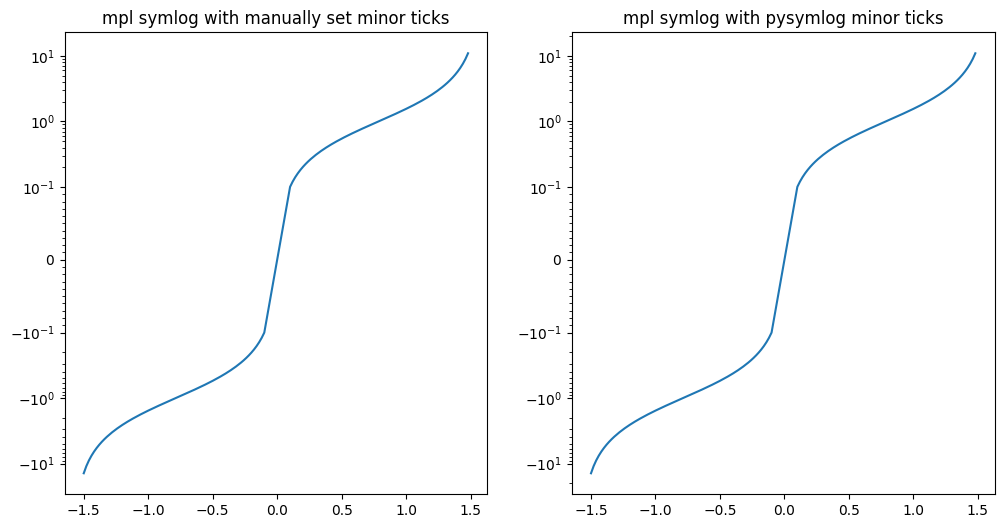

In [53]:
x = np.arange(-1.5, 1.5, 0.02)
y = np.tan(x)

fig=plt.figure(1, figsize=(12,6))

ax1 = plt.subplot(121); plt.title('mpl symlog with manually set minor ticks')
plt.plot(x, y)
ax1.set_yscale('symlog', linthresh=0.1)
#ax2.xaxis.set_minor_locator( ticker.LogLocator(base = 10.0, subs=np.arange(1.0, 10.0)*.1, numticks=10) ) 
#ax2.xaxis.set_minor_formatter(ticker.NullFormatter())
#--> The above doesn't work for symlog, but 
ax1.yaxis.set_minor_locator( ticker.SymmetricalLogLocator(base = 10.0, linthresh=0.1, subs=np.arange(1.0, 10.0)*.1) ) 
ax1.yaxis.set_minor_formatter(ticker.NullFormatter())
#--> This works...

ax2 = plt.subplot(122); plt.title('mpl symlog with pysymlog minor ticks')
plt.plot(x, y)
ax2.set_yscale('symlog', linthresh=0.1)
#ax2.yaxis.set_minor_locator(psl.MinorSymLogLocator(linthresh=-.1)) #1e-1 here is linthresh used in symlog
#ax2.yaxis.set_minor_formatter(ticker.NullFormatter())
#--> The above two commands can also be achieved with the convenience function 
#    psl.set_symlog_minorticks() which also allows for specifying 'x', 'y', or 'both' axes
psl.set_symlog_minorticks(ax2, thresh=0.1, xy='y')

plt.show()
plt.clf(); plt.close('all')

Finally, for working in the pysymlog symmetric log space (smooth transition through zero) there is a class for Locating its symmetric log scale major and minor ticks: ```SymmetricLogarithmLocator``` (distinct from matplotlib's ```SymmetricalLogarithmLocator``` -- note the extra "-al") and ```MinorSymmetricLogLocator```

There are also pysymlog classes for ```SymmetricLogarithmTransform``` and ```InvertedSymmetricLogarithmTransform``` that work similarly to their other matplotlib counterparts.

Here are some examples using pysymlog symmetric log scale Locators and convenience functions for dealing with ticks in this scaling:

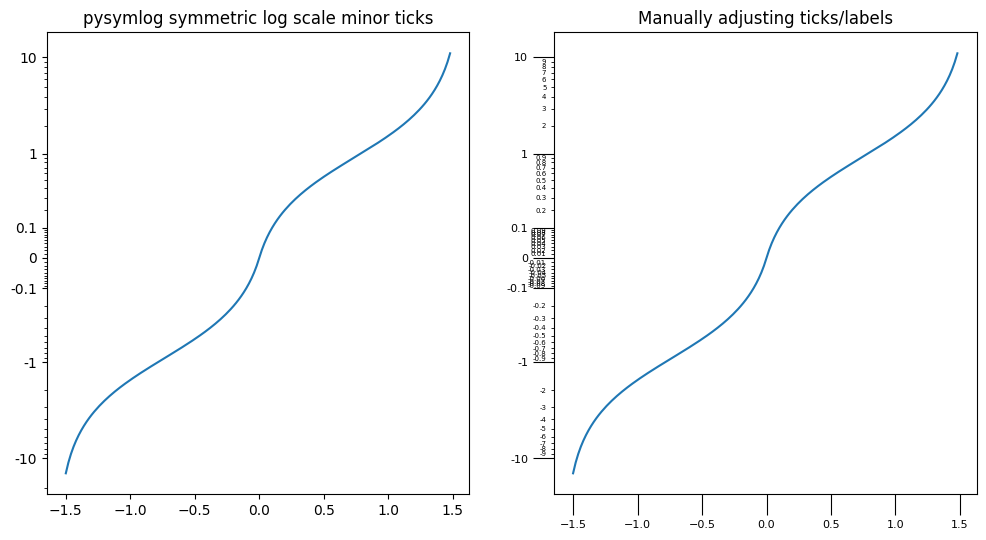

In [37]:
x = np.arange(-1.5, 1.5, 0.02)
y = np.tan(x)

fig=plt.figure(1, figsize=(12,6))

ax1 = plt.subplot(121); plt.title('pysymlog symmetric log scale minor ticks')
plt.plot(x, y)
ax1.set_yscale('symmetriclog', shift=0.1)
psl.set_symmetriclog_minorticks(ax1, thresh=0.1, xy='y') #here, "thresh" is threshold for ticks, not the "shift" for transform
psl.reformat_major_ticklabels(ax1, xy='y')

ax2 = plt.subplot(122); plt.title('Manually adjusting ticks/labels')
plt.plot(x, y)
ax2.set_yscale('symmetriclog', shift=0.1)

## Manually Formatting major and minor ticks
#Major
ax2.yaxis.set_major_formatter( ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
ax2.tick_params(which='major', labelsize=8, size=15) #size here is the extent/length of the tick

#Minor
ax2.yaxis.set_minor_locator( psl.SymmetricLogarithmLocator(base = 10.0, shift=0.1, subs=np.arange(1.0, 10.0)*.1) ) 
#ax2.yaxis.set_minor_formatter(ticker.NullFormatter()) #<-- use this for setting minor ticks with no labels
# Also include minor tick labels, for fun 
ax2.yaxis.set_minor_formatter( ticker.FormatStrFormatter("%.1g") )
#--> This could also be accomplished with the convenience function:
#psl.set_symmetriclog_minorticks(ax2, xy='y', thresh=1e-1, formatter=FormatStrFormatter("%.1g") )
ax2.tick_params(which='minor', labelsize=5, size=2)

plt.show()
plt.clf(); plt.close('all')

Managing the major ticks and labels is also straightforward with pysymlog using ```reformat_major_ticklabels```, which uses matplotlib's ```FuncFormatter``` as shown in the above example for changing the label format, and with some parameters for controlling the locators. 

The ```xy``` parameter specifies which axis to modify, "x" or "y".  You can also specfy "both" or "xy" to change both axes at once using the same parameters, or just run the command separately on each axis to use different parameters. 

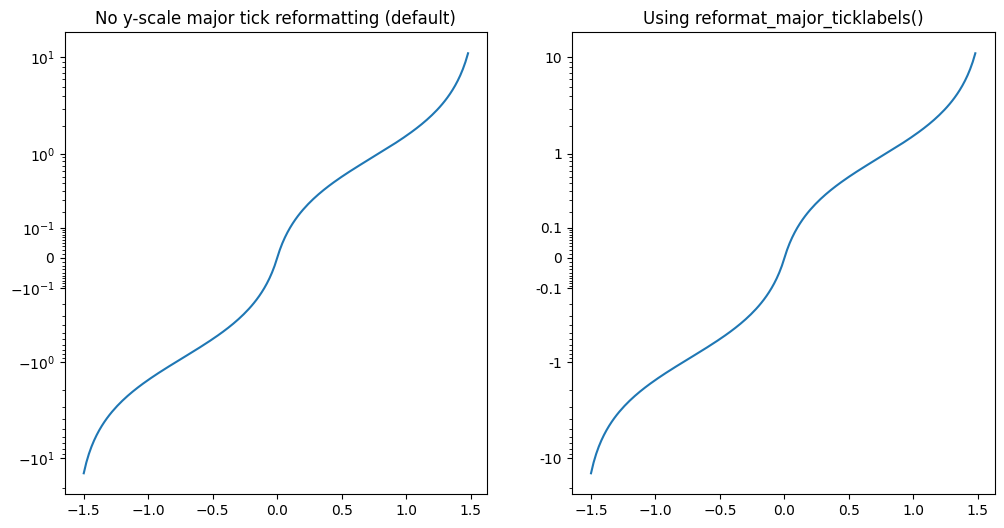

In [72]:
#psl.reformat_major_ticklabels(ax, xy='y', tickvals='auto', fmt='{:g}', lineobjind=0, thresh='auto', auto_percentile=10.)
plt.rcdefaults()
fig=plt.figure(1, figsize=(12,6))

ax1 = plt.subplot(121); plt.title('No y-scale major tick reformatting (default)')
plt.plot(x, y)
ax1.set_yscale('symmetriclog', shift=0.1)

ax2 = plt.subplot(122); plt.title('Using reformat_major_ticklabels()')
plt.plot(x, y)
ax2.set_yscale('symmetriclog', shift=0.1)

## Reformat the major ticks
psl.reformat_major_ticklabels(ax2, xy='y')#, tickvals='auto', thresh='auto', fmt='{:g}', auto_percentile=10.
## Some different options for more manual control
#psl.reformat_major_ticklabels(ax2, xy='y', tickvals=[-10,-1,-.1,0,0.1,1,10], fmt='{:.3f}'  )
#psl.reformat_major_ticklabels(ax2, xy='y', tickvals='auto', thresh=0.01  )
#psl.reformat_major_ticklabels(ax2, xy='both')

plt.show()
plt.clf(); plt.close('all')

------------------------------------------
## <u>Using pysymlog with plotly</u> <a name="plotly"></a>

Pysymlog makes plotting in symmetric log scale with plotly relatively straightforward.  

Start off by 'registering' the plotly utilities - which really only means it's importing plotly and loading the functions.  Again, by design, pysymlog separates the matplotlib and plotly imports, so that you don't need to import matplotlib if you're only using plotly, and vice versa.

Several convenience functions are defined for making scatter plots, line plots, and histograms with both plotly.graph_objects and plotly.express.

Two-dimensional histogram or heatmap plotting functions are also defined, that rely on px.density_heatmap and go.Histogram2D. 

### Symmetric log scale with plotly.graph_objects  <a name="plotly.go"></a>

In [50]:
### Some initialization for the jupyter notebook
import numpy as np
import plotly.io as pio
#pio.renderers.default = "notebook_connected"
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
###

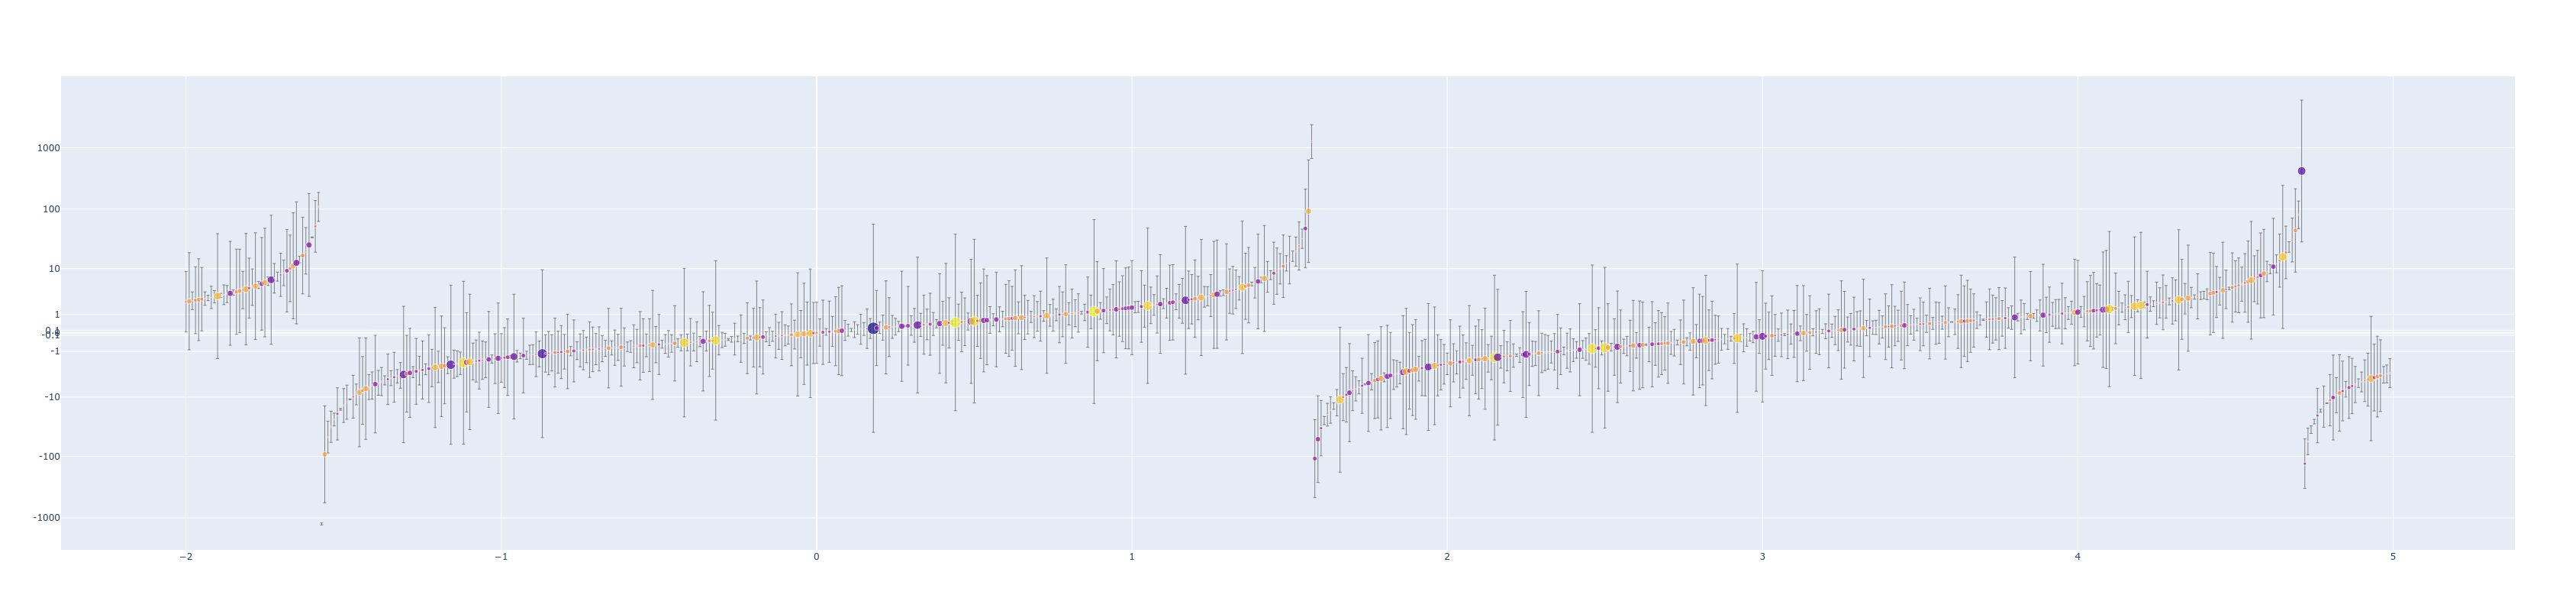

In [51]:
import plotly.graph_objects as go
import pysymlog as psl

psl.register_plotly()


### Setting plotly symmlog scale with automatic function
xdata = np.arange(-2, 5.0, 0.01)
ydata = np.tan(xdata)
yerrs = np.random.randn(len(xdata))/2
sizes = np.abs(np.int32(10*yerrs))

fig = go.Figure()
#psl.go_scatter_symlog(fig, xdata, ydata, xy='y')
psl.go_scatter_symlog(fig, xdata, ydata, xy='y', error_y=dict(array=yerrs, color='#555555', thickness=0.7, width=2), mode='markers', marker=dict(size=sizes, color=yerrs, colorscale='Plasma_r'))
#... Make xlabel/ylabel/title...
fig.update_layout(width=1200, height=800)
fig.show()


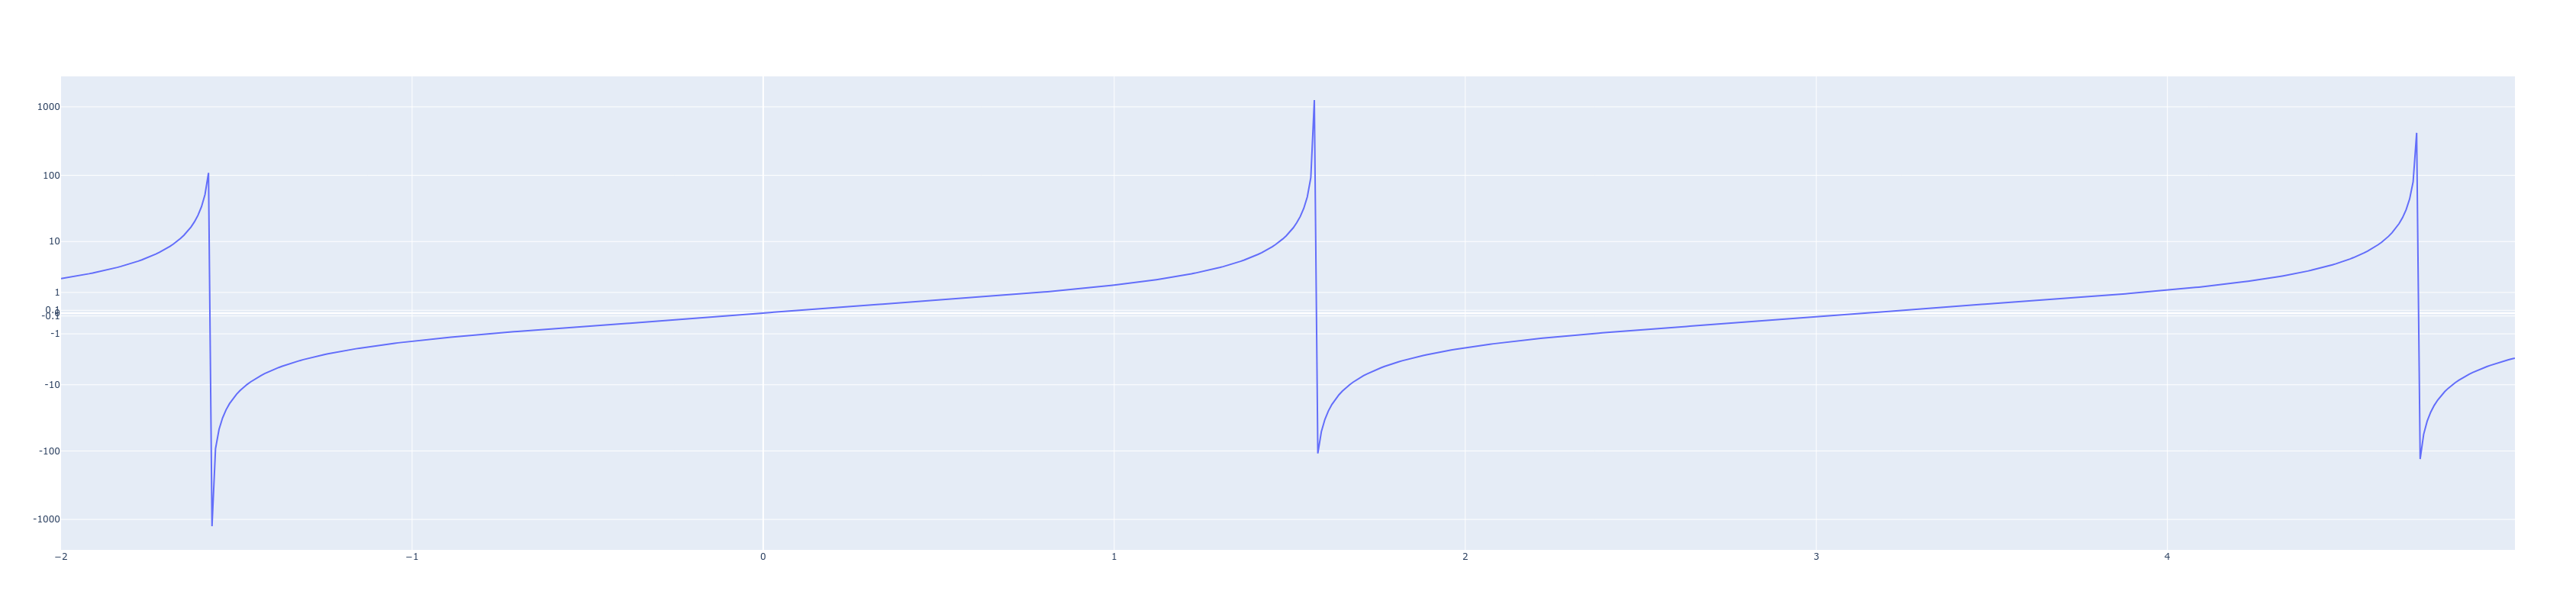

In [39]:
### Setting plotly symlog scale manually -- above is same as doing this:
xdata = np.arange(-2, 5.0, 0.01)
ydata = np.tan(xdata)
fig = go.Figure()
fig.add_trace(go.Scatter(x=xdata, y=psl.symmetric_logarithm(ydata, shift=1.) ))#, hovertemplate='( %{customdata:G}, %{y} )<extra></extra>', customdata=xdata,))
#psl.symmetric_log_decades_from_array( psl.inverse_symmetric_logarithm(fig.data[0]['y'], shift=1. ), auto_percentile=10.)
psl.set_plotly_scale_symmetriclog(fig, xy='y', tickvals_x='auto', tickvals_y='auto', shift=1.)
#... Make xlabel/ylabel/title...
fig.update_layout(width=1200, height=800)
fig.show()

### Symmetric log scale with plotly.express  <a name="plotly.px"></a>

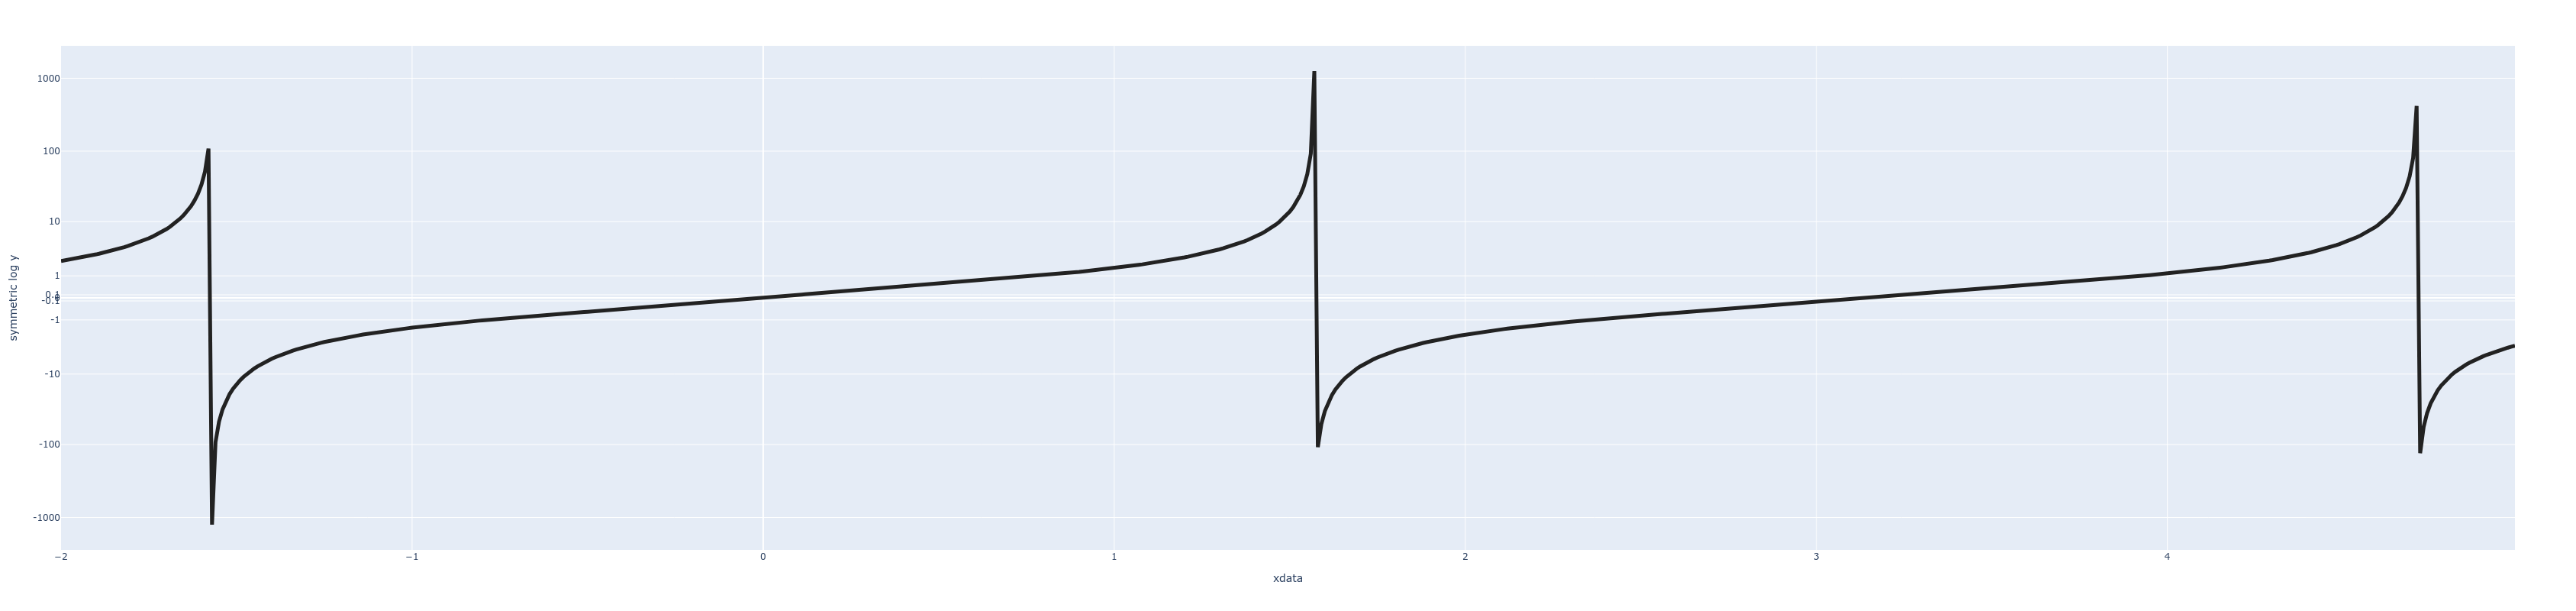

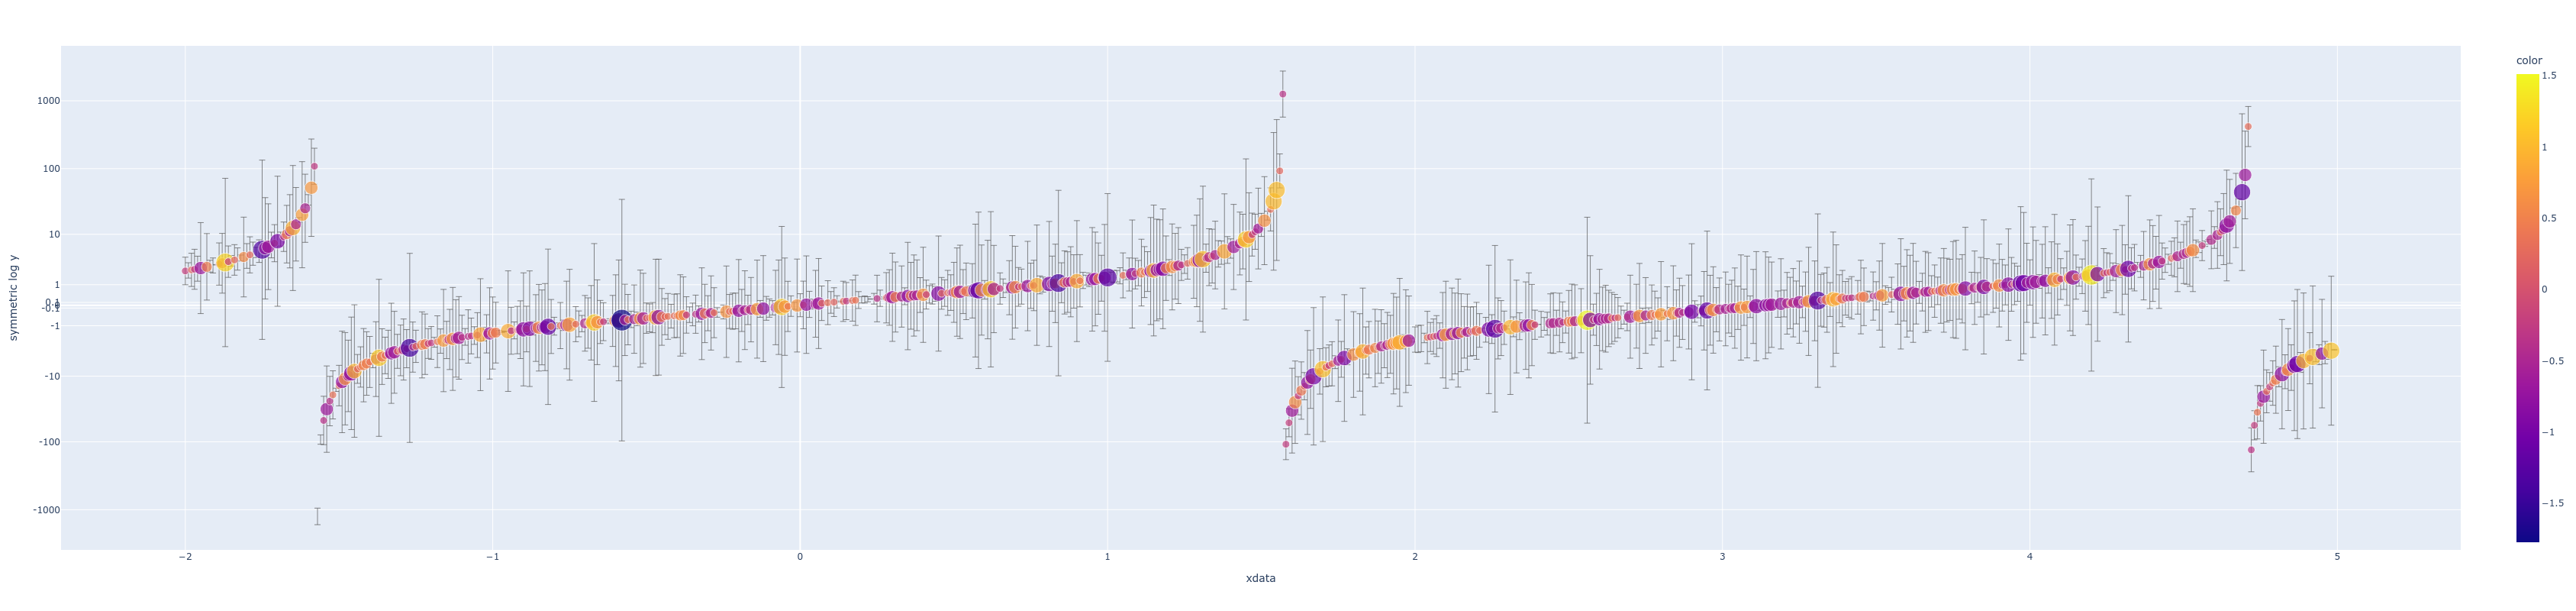

In [40]:
import plotly.express as px

xdata = np.arange(-2, 5.0, 0.01)
ydata = np.tan(xdata)
yerrs = np.random.randn(len(xdata))/2
sizes = np.abs(np.int32(5*yerrs))

## With the pysymlog functions

## Line
fig = psl.px_line_symlog(xdata, ydata, xy='y', labels={'x':'xdata', 'y':'symmetric log y'})#, width=1500, height=1000)
fig.update_traces(line_color='#222222', line_width=5)
#... Make xlabel/ylabel/title...
fig.update_layout(width=1200, height=800)
fig.show()

## Scatter plot, with error bars
fig2 = psl.px_scatter_symlog(xdata, ydata, xy='y', labels={'x':'xdata', 'y':'symmetric log y'}, 
                             error_y=yerrs, size=sizes, color=yerrs, color_discrete_sequence= px.colors.sequential.Plasma_r)
fig2.data[0].error_y.color='#555555'
fig2.data[0].error_y.thickness=0.7
fig2.update_layout(width=1200, height=800)
fig2.show()


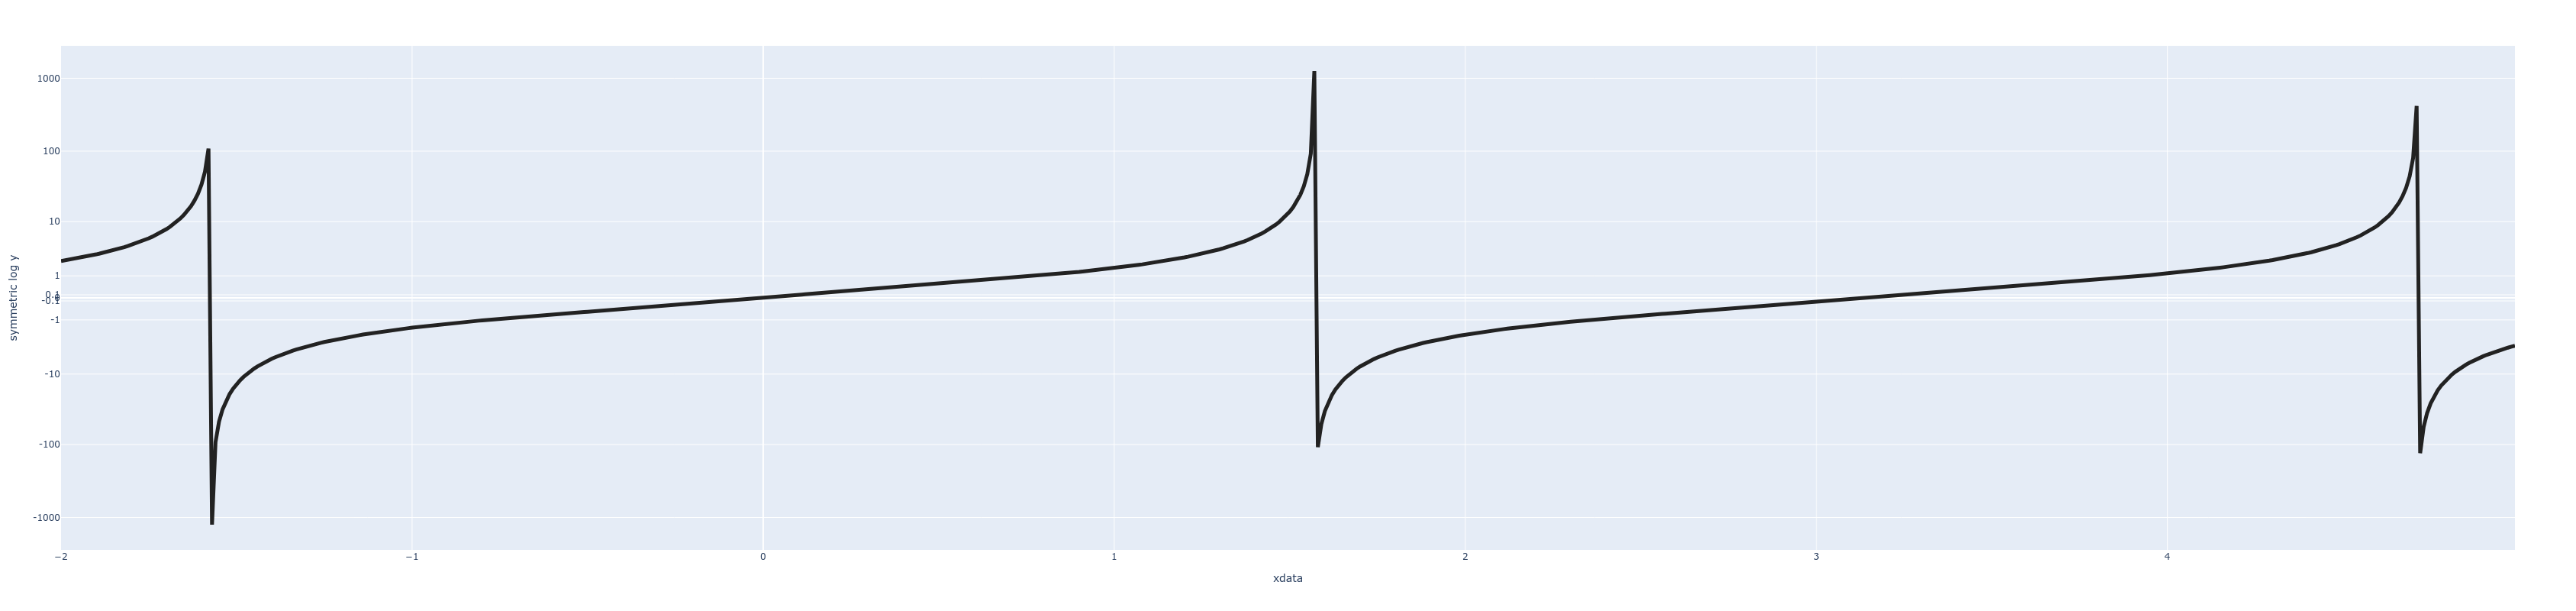

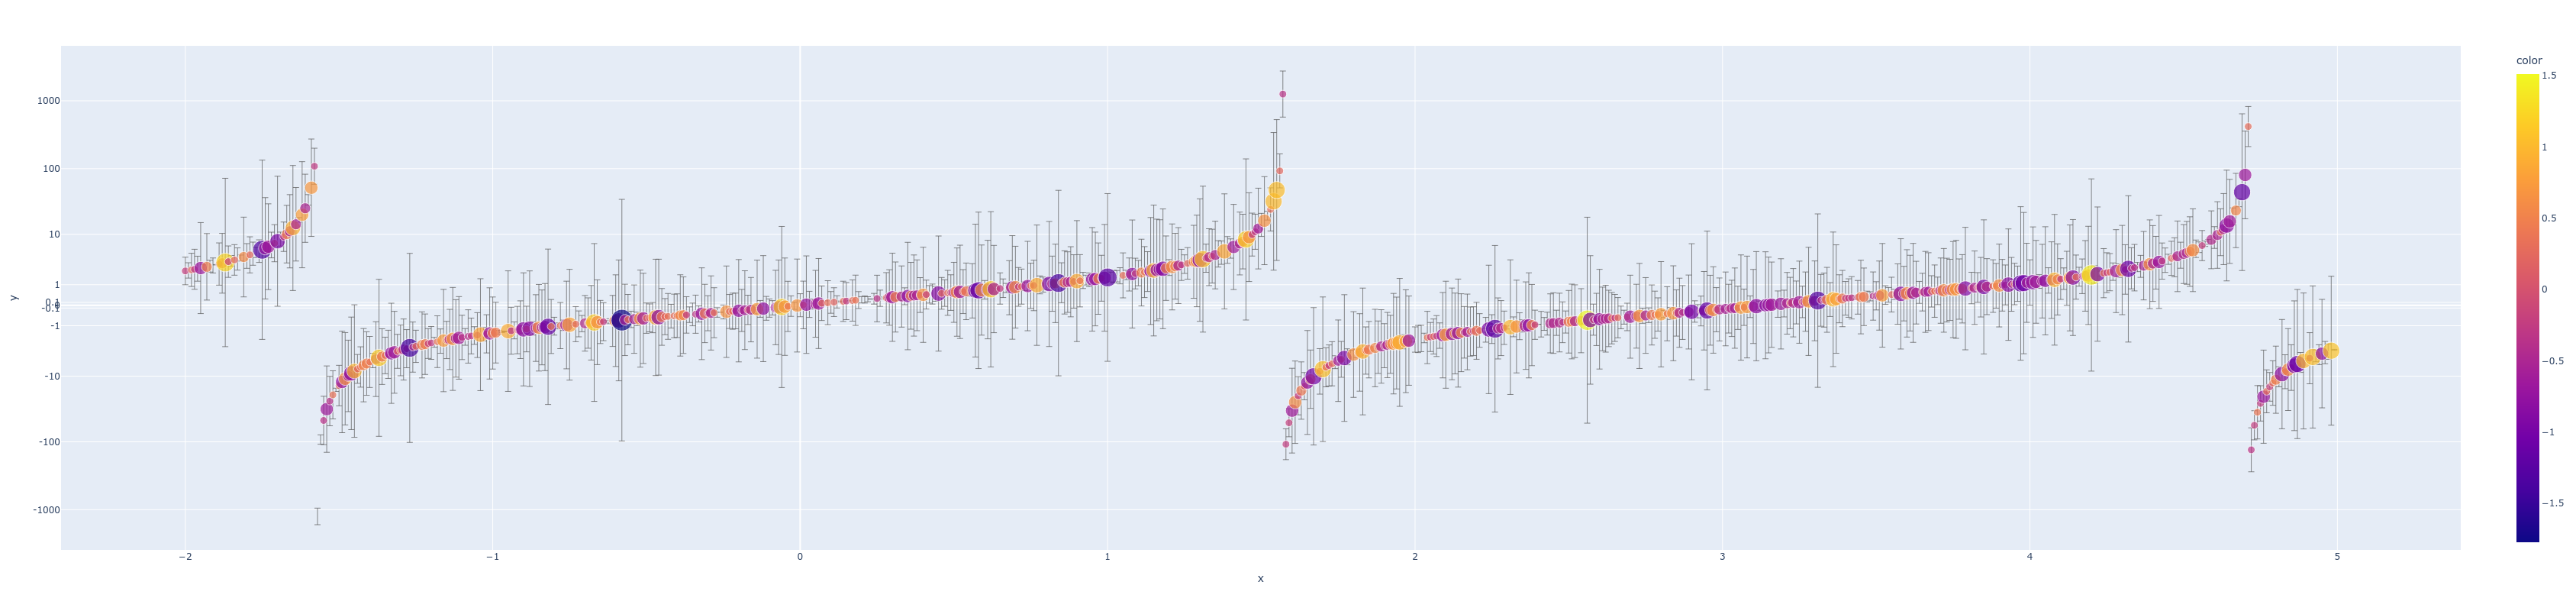

In [41]:
## Standard plotly functions with manual setting of symmetric log scale -- same results as above
fig = px.line(x=xdata, y=psl.symmetric_logarithm(ydata, shift=1.), labels={'x':'xdata', 'y':'symmetric log y'})
fig.update_traces(line_color='#222222', line_width=5)
#fig.add_scatter(...)
psl.set_plotly_scale_symmetriclog(fig, xy='y', tickvals_x='auto', tickvals_y='auto', shift=1.)
#... Make xlabel/ylabel/title...
fig.update_layout(width=1200, height=800)
fig.show()

fig2 = px.scatter(x=xdata, y=psl.symmetric_logarithm(ydata, shift=1.), error_y=yerrs, size=sizes, color=yerrs, color_discrete_sequence= px.colors.sequential.Plasma_r)
fig2.data[0].error_y.color='#555555'
fig2.data[0].error_y.thickness=0.7
psl.set_plotly_scale_symmetriclog(fig2, xy='y', tickvals_x='auto', tickvals_y='auto', shift=1.)
#... Make xlabel/ylabel/title...
fig2.update_layout(width=1200, height=800)
fig2.show()

### plotly histograms with symmetric log bins  <a name="plotly.hist"></a>


Functions for plotting with both plotly.graph_objects and plotly.express. 
The standard plotly histogram functions do not currently allow users to set specific bin arrays, so under the hood these functions are calling go.Bar and px.bar.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pysymlog as psl
psl.register_plotly()


dt2 = 0.01
x2 = np.arange(-2, 5.0, dt2)
y2 = np.tan(x2)

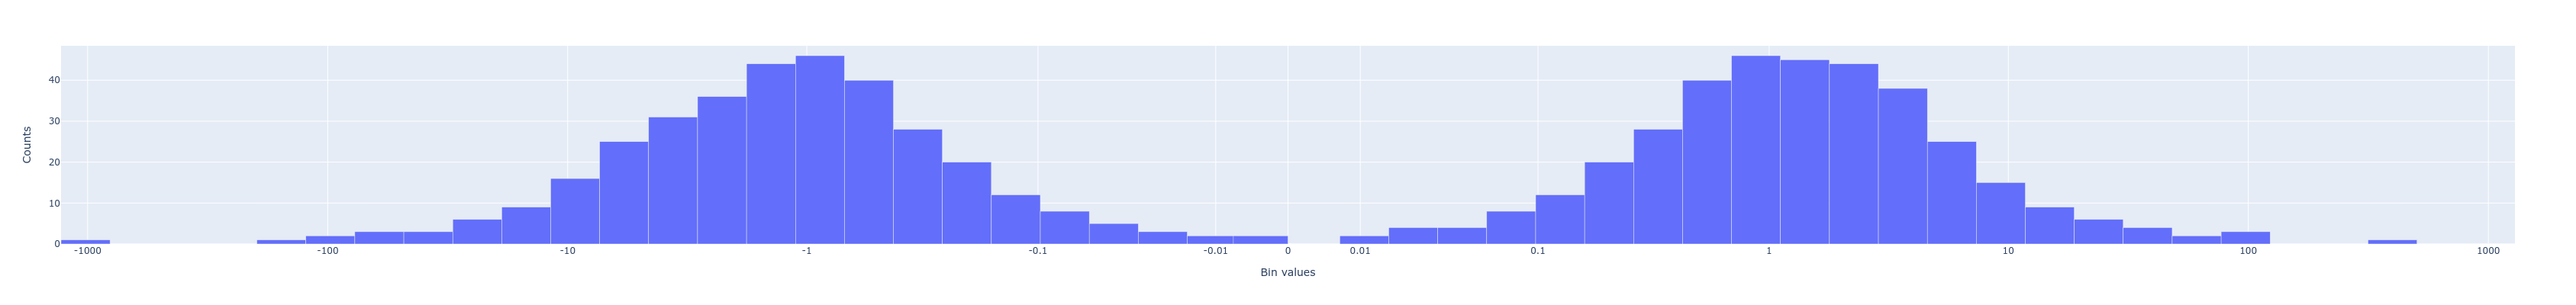

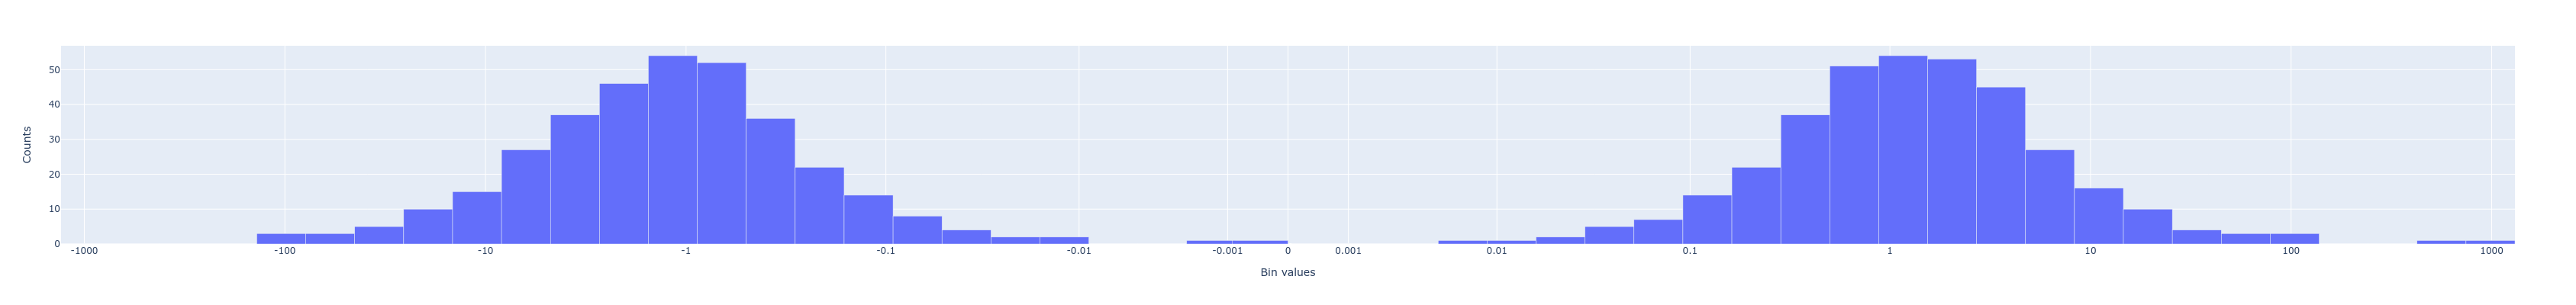

In [43]:
##### plotly.express

import plotly.express as px

fig = psl.px_histogram_symlog(y2, 50, shift=1e-2)#binwidth_frac=1., base=10, orientation='horizontal', labels={'x':'Bin values','y':'Counts'}, tickvals_x='auto', tickvals_y='auto',  marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
#fig.update_xaxes(tickvals=psl.symmetric_logarithm(psl.symmetric_log_decades_from_array([-1000,1000], thresh=.1)), ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1)
#fig.update_xaxes(showgrid=True)
fig.update_layout(width=800, height=400)
fig.show()

## Manually specifying bin edges
symlogbins = psl.symmetric_logspace(y2.min(), y2.max(), 50, input_format='linear', shift=1e-3, base=10)
fig = psl.px_histogram_symlog(y2, bins=symlogbins, shift=1e-3)
fig.update_layout(width=800, height=400)
fig.show()


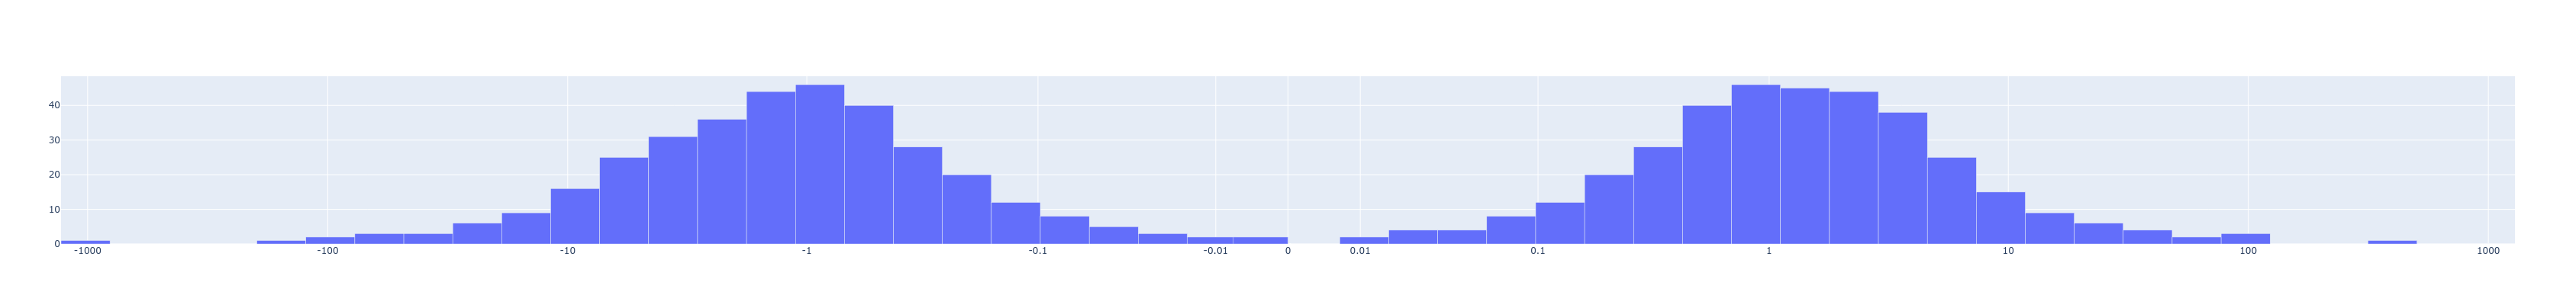

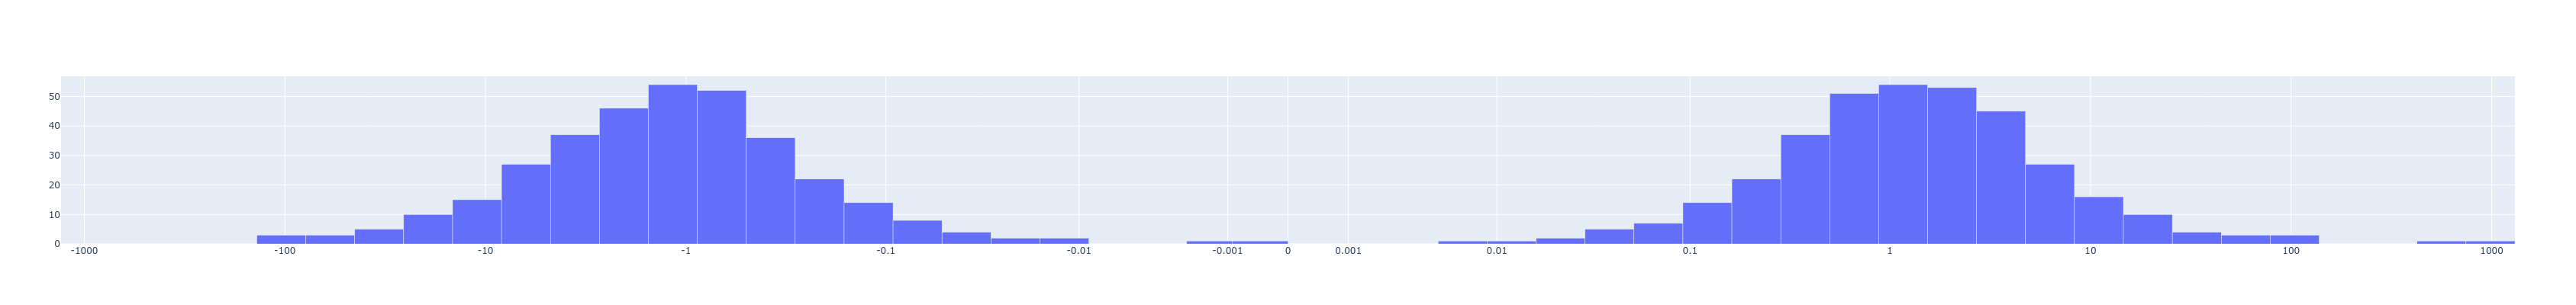

In [44]:
##### plotly.graph_objects
import plotly.graph_objects as go

fig = psl.go_histogram_symlog(y2, 50, shift=1e-2)#binwidth_frac=1., base=10, orientation='horizontal', labels={'x':'Bin values','y':'Counts'}, tickvals_x='auto', tickvals_y='auto',  marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
#fig.update_xaxes(tickvals=psl.symmetric_logarithm(psl.symmetric_log_decades_from_array([-1000,1000], thresh=.1)), ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1)
#fig.update_xaxes(showgrid=True)
fig.update_layout(width=800, height=400)
fig.show()

## Manually specifying bin edges
symlogbins = psl.symmetric_logspace(y2.min(), y2.max(), 50, input_format='linear', shift=1e-3, base=10)
fig = psl.go_histogram_symlog(y2, bins=symlogbins, shift=1e-3)
fig.update_layout(width=800, height=400)
fig.show()


### 2D plotly density maps with symmetric log bins  <a name="plotly.2Dhist"></a>

At the moment plotly 2D histograms (px.density_heatmap and go.Histogram2D) do not allow direct specification of bin edges as arrays.  However, 2D density with symmetric log scales can still be represented fairly easily with px.imshow or go.Contour plots. 

Calculate the bin centers, transform them to symmetric log, and use those transformed x,y values as input to the contour/imshow plot.

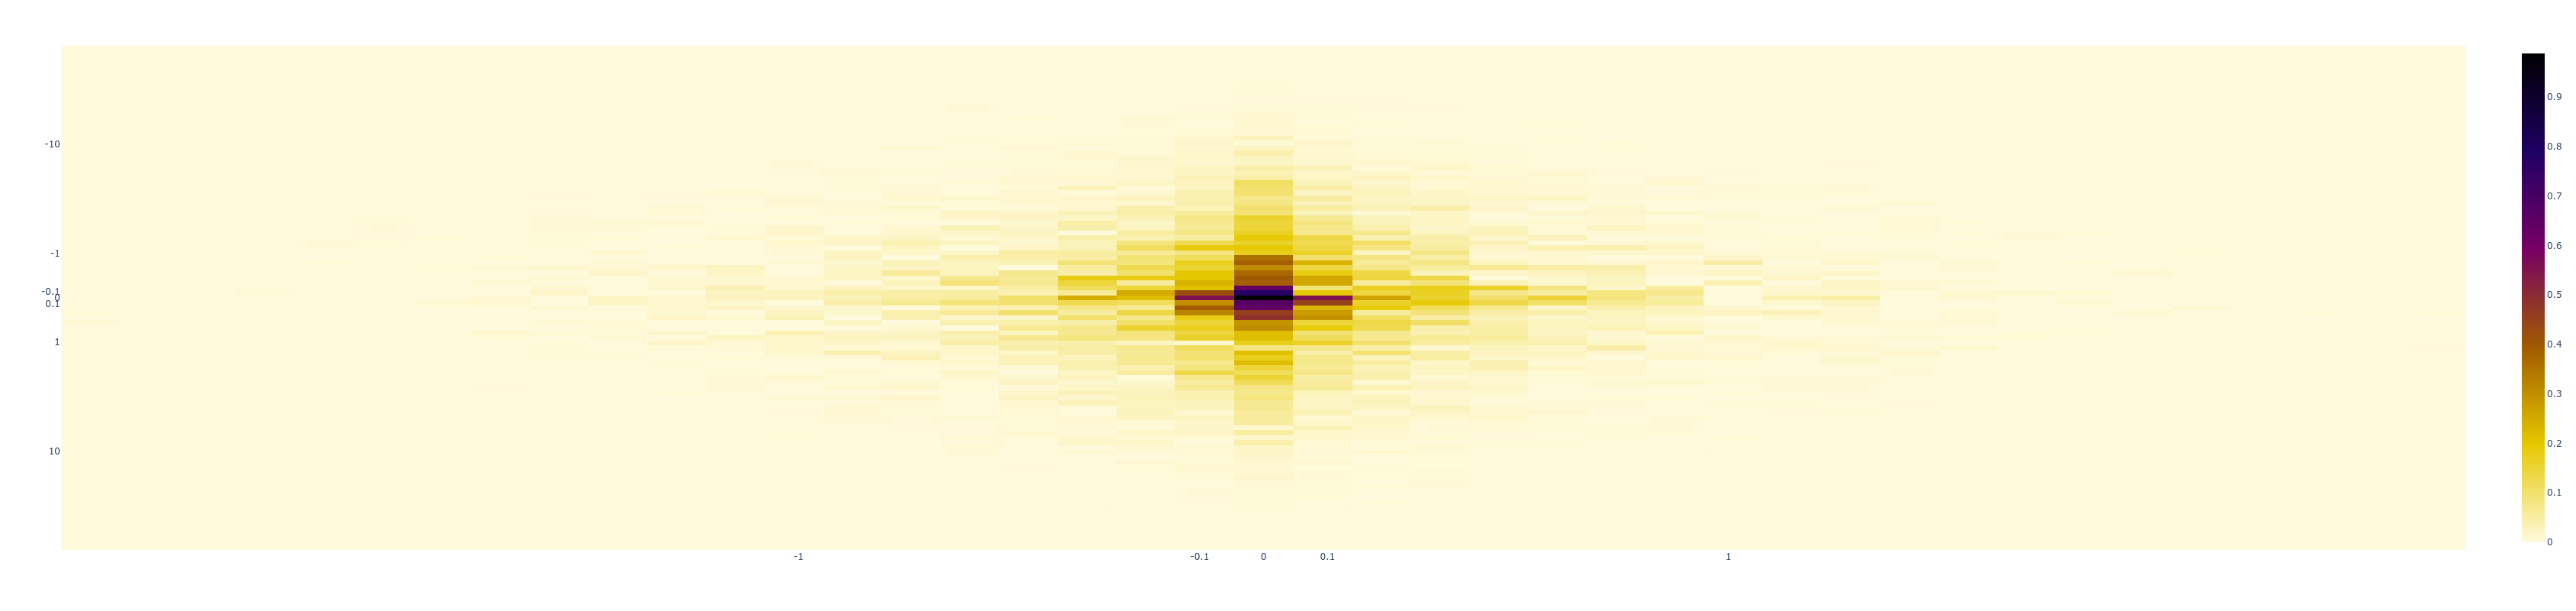

In [45]:
### 2D histogram using plotly.express.imshow

## Generate some sample data
dx = np.random.exponential(scale=0.5, size=5000)*np.random.randn(5000)
dy = np.random.exponential(scale=5, size=5000)*np.random.randn(5000)

## Make the histogram values and bins (with the same limits and parameters as in the earlier example)
hcount_densities,bins_x2, bins_y2 = psl.symlogbin_histogram2d(dx,dy, [41,101], limits=[[-5,5],[-50,50]], shift=1, density=True)

## Calculate the centers of the bins
center_bins_x = 0.5 * (bins_x2[:-1] + bins_x2[1:])
center_bins_y = 0.5 * (bins_y2[:-1] + bins_y2[1:])
cbins_x_symlog = psl.symmetric_logarithm(center_bins_x,shift=1)
cbins_y_symlog = psl.symmetric_logarithm(center_bins_y,shift=1)

## Plot the contour map -- if you want square pixels use aspect='equal', if not- use aspect='auto'
fig = px.imshow(hcount_densities.T, x=cbins_x_symlog, y=cbins_y_symlog, color_continuous_scale='Electric_r', aspect='auto')

## Update the x and y scales to symmetriclog
psl.set_plotly_scale_symmetriclog(fig, xy='xy', tickvals_x='auto', tickvals_y='auto', auto_percentile=10., shift=1., base=10)

fig.update_layout(width=800, height=800)
fig.show()

Note that colorscale normalization (e.g. log colorbar/cmap values) is not part of the standard plotly toolbox.  The ```plotly_utils``` package ([here](https://github.com/SengerM/plotly_utils/blob/d9675fd3e98be05760700040ea2d7061d300f7d2/plotly_utils/__init__.py#L272)) has a convenient function for ```imshow_logscale``` for a workaround.  The best procedure at the moment is probably to transform (i.e. symmetric log) the density array and plot that with px.imshow, so that the colorbar is linear in that space, then set the hover values to the original density array (e.g.: fig['data'][0].customdata=density_array ).

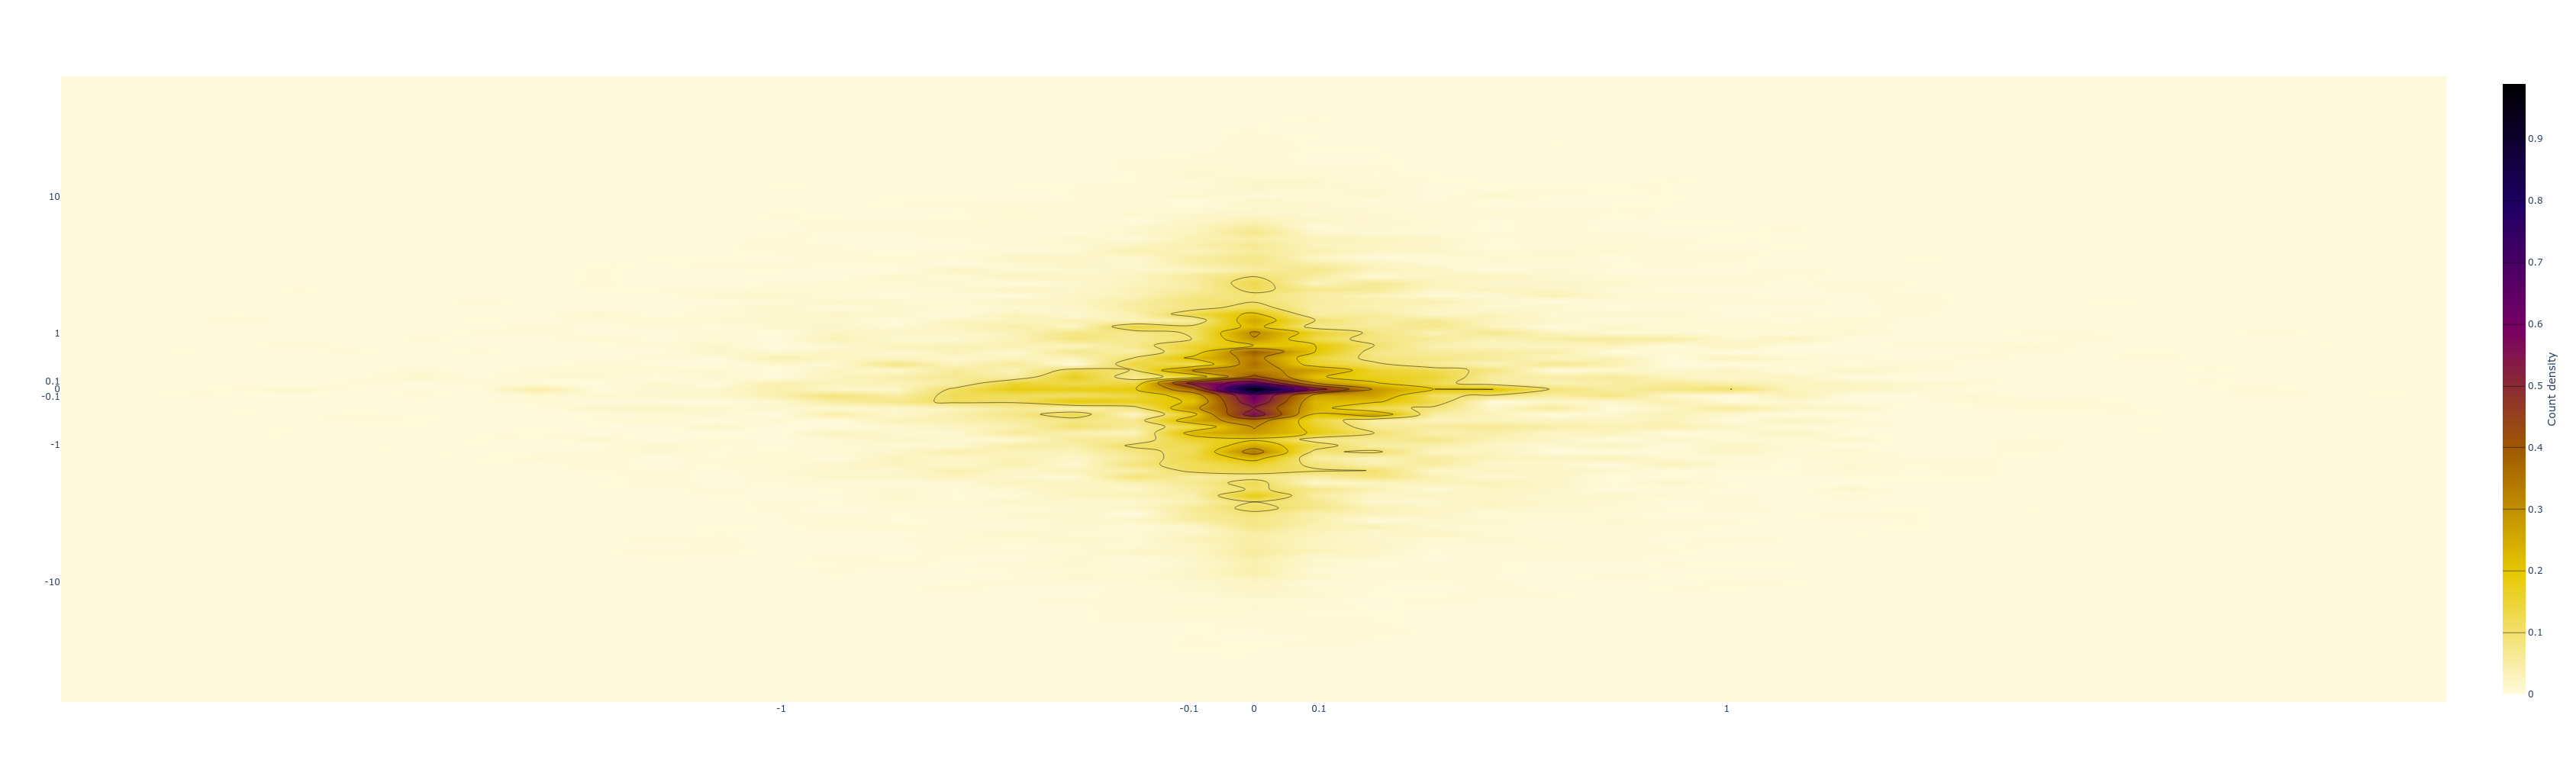

In [46]:
### 2D Contour/Heatmap using plotly.graph_objects.Contour

## Generate some sample data
dx = np.random.exponential(scale=0.5, size=5000)*np.random.randn(5000)
dy = np.random.exponential(scale=5, size=5000)*np.random.randn(5000)

## Make the histogram values and bins
hcount_densities,bins_x2, bins_y2 = psl.symlogbin_histogram2d(dx,dy, [41,101], limits=[[-5,5],[-50,50]], shift=1, density=True)

## Calculate the centers of the bins
center_bins_x = 0.5 * (bins_x2[:-1] + bins_x2[1:])
center_bins_y = 0.5 * (bins_y2[:-1] + bins_y2[1:])
cbins_x_symlog = psl.symmetric_logarithm(center_bins_x,shift=1)
cbins_y_symlog = psl.symmetric_logarithm(center_bins_y,shift=1)

## Plot the contour map
fig = go.Figure( data=go.Contour(z=hcount_densities.T, x=cbins_x_symlog, y=cbins_y_symlog, colorscale='Electric_r',
                                colorbar=dict(title='Count density',titleside='right'),
                                contours_coloring='heatmap', #'line', 'heatmap'...
                                )
               )

## Update the x and y scales to symmetriclog
psl.set_plotly_scale_symmetriclog(fig, xy='xy', tickvals_x='auto', tickvals_y='auto', auto_percentile=10., shift=1., base=10)

fig.update_layout(width=800, height=1000)
fig.show()